# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.1 Load Data

In [2]:
df_raw = pd.read_csv('../data/raw/price_elasticity_of_demand.csv')

df = df_raw.copy()

In [8]:
df_raw = df_raw.drop(columns={  'Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 
                                'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency'})

In [9]:
df_raw.head()

Date_imp_d                 Category_name  \
0  2017/12/14  speaker, portable, bluetooth   
1  2017/09/08  speaker, portable, bluetooth   
2  2017/10/24  speaker, portable, bluetooth   
3  2017/08/15  speaker, portable, bluetooth   
4  2017/09/14  speaker, portable, bluetooth   

                                                name  price  disc_price  \
0  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.00       64.99   
1  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.00       69.00   
2  Boytone - 2500W 2.1-Ch. Home Theater System - ...  66.00       66.00   
3  Boytone - 2500W 2.1-Ch. Home Theater System - ...  74.99       74.99   
4  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.99       69.99   

      merchant  Disc_percentage isSale  Imp_count    brand  \
0  Walmart.com             0.06    Yes          1  Boytone   
1  Walmart.com             0.00     No          1  Boytone   
2  Walmart.com             0.00     No          1  Boytone   
3  Walmart.com             0.00     No          1  Boytone   
4  Walmart.com             0.00     No          1  Boytone   

                                       p_description             dateAdded  \
0  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
1  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
2  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
3  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
4  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   

               dateSeen           dateUpdated manufacturer     Day_n  month  \
0  2017-12-14T06:00:00Z  2018-06-13T19:39:02Z      Boytone  Thursday     12   
1  2017-09-08T05:00:00Z  2018-06-13T19:39:02Z      Boytone    Friday      9   
2  2017-10-24T04:00:00Z  2018-06-13T19:39:02Z      Boytone   Tuesday     10   
3  2017-08-15T15:00:00Z  2018-06-13T19:39:02Z      Boytone   Tuesday      8   
4  2017-09-14T21:00:00Z  2018-06-13T19:39:02Z      Boytone  Thursday      9   

     month_n  day  Week_Number  
0   December   14           50  
1  September    8           36  
2    October   24           43  
3     August   15           33  
4  September   14           37

# 1.0 Descrição dos dados

In [11]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [12]:
cols_name = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'dateadded', 'dateseen', 'dateupdated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']
df1.columns = cols_name

## 1.2 Data Dimension

In [13]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of cols: {df1.shape[1]}')

Number of rows: 23151
Number of cols: 20


## 1.3 Data types

In [14]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
dateadded           object
dateseen            object
dateupdated         object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4 Check NA

In [15]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
dateadded              0
dateseen               0
dateupdated            0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.5 Change Types

In [16]:
df1['date_imp'] = pd.to_datetime( df1['date_imp'])

## 1.7 Descriptive Statistics

In [17]:
num_attributes = df1.select_dtypes( include=['float64', 'int64'])
cat_attributes = df1.select_dtypes( exclude=['float64', 'int64', 'datetime64[ns]'])

## 1.7.1 Numerical attributes

In [12]:
# central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean) ).T   # média
ct2 = pd.DataFrame(num_attributes.apply(np.median) ).T  # mediana

# dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std) ).T # Desvio padrão
d2 = pd.DataFrame(num_attributes.apply(min) ).T # valor mínimo
d3 = pd.DataFrame(num_attributes.apply(max) ).T # valor máximo
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T #skewness
d6 = pd.DataFrame(num_attributes.apply( lambda x : x.kurtosis())).T # kurtosis

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m

att  min       max     range        mean  median         std  \
0            price  1.0  10879.95  10878.95  513.037803  199.99  859.091448   
1       disc_price  1.0  10879.95  10878.95  494.104295  199.00  808.571509   
2  disc_percentage  0.0      0.80      0.80    0.016933    0.00    0.077847   
3        imp_count  1.0     31.00     30.00    6.560926    5.00    5.403049   
4            month  1.0     12.00     11.00    7.651030    8.00    2.592787   
5              day  1.0     31.00     30.00   15.693879   16.00    9.681413   
6      week_number  1.0     51.00     50.00   31.342750   32.00   11.316253   

       skew       kurt  
0  4.595160  34.411146  
1  4.748349  39.612839  
2  5.217632  28.754920  
3  1.286351   1.639569  
4 -0.099417  -0.628859  
5  0.032258  -1.331838  
6 -0.266980  -0.648027

# 2.0 - EDA

In [18]:
df2 = df1.copy()

In [19]:
df2.head()

date_imp                 category_name  \
0 2017-12-14  speaker, portable, bluetooth   
1 2017-09-08  speaker, portable, bluetooth   
2 2017-10-24  speaker, portable, bluetooth   
3 2017-08-15  speaker, portable, bluetooth   
4 2017-09-14  speaker, portable, bluetooth   

                                                name  price  disc_price  \
0  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.00       64.99   
1  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.00       69.00   
2  Boytone - 2500W 2.1-Ch. Home Theater System - ...  66.00       66.00   
3  Boytone - 2500W 2.1-Ch. Home Theater System - ...  74.99       74.99   
4  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.99       69.99   

      merchant  disc_percentage is_sale  imp_count    brand  \
0  Walmart.com             0.06     Yes          1  Boytone   
1  Walmart.com             0.00      No          1  Boytone   
2  Walmart.com             0.00      No          1  Boytone   
3  Walmart.com             0.00      No          1  Boytone   
4  Walmart.com             0.00      No          1  Boytone   

                                       p_description             dateadded  \
0  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
1  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
2  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
3  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
4  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   

               dateseen           dateupdated manufacturer     day_n  month  \
0  2017-12-14T06:00:00Z  2018-06-13T19:39:02Z      Boytone  Thursday     12   
1  2017-09-08T05:00:00Z  2018-06-13T19:39:02Z      Boytone    Friday      9   
2  2017-10-24T04:00:00Z  2018-06-13T19:39:02Z      Boytone   Tuesday     10   
3  2017-08-15T15:00:00Z  2018-06-13T19:39:02Z      Boytone   Tuesday      8   
4  2017-09-14T21:00:00Z  2018-06-13T19:39:02Z      Boytone  Thursday      9   

     month_n  day  week_number  
0   December   14           50  
1  September    8           36  
2    October   24           43  
3     August   15           33  
4  September   14           37

In [15]:
df2.columns

Index(['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant',
       'disc_percentage', 'is_sale', 'imp_count', 'brand', 'p_description',
       'dateadded', 'dateseen', 'dateupdated', 'manufacturer', 'day_n',
       'month', 'month_n', 'day', 'week_number'],
      dtype='object')

Qual o merchant que mais vendeu?

Qual a categoria mais vendida?

Qual a marca mais vendida?

Quais os dias que mais vendem?

Quais os meses que mais vendem

Quais as semanas que mais vendem

## 2.1 Qual o merchant que mais vendeu?

<AxesSubplot:xlabel='merchant', ylabel='date_imp'>

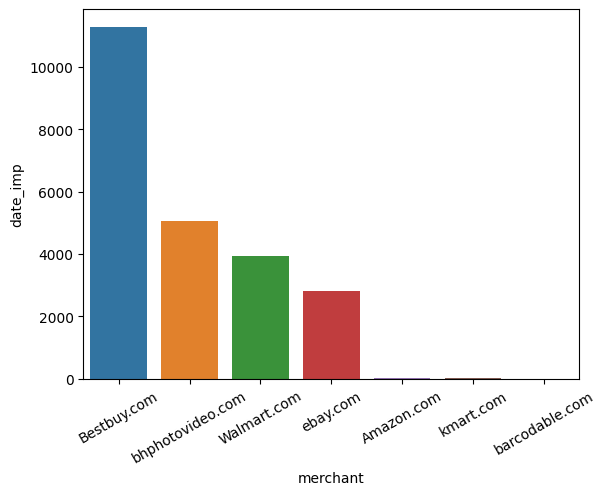

In [16]:
aux1 = df2[['date_imp', 'merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=30)
sns.barplot(x='merchant', y='date_imp', data=aux1)

In [22]:
#seleção de lojas
df_best     = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp      = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart  = df2[df2['merchant'] == 'Walmart.com']
df_ebay     = df2[df2['merchant'] == 'ebay.com']

## 2.2 Qual a categoria mais vendida?

### 2.2.1 Categorias mais vendidas no geral

<AxesSubplot:xlabel='category_name', ylabel='date_imp'>

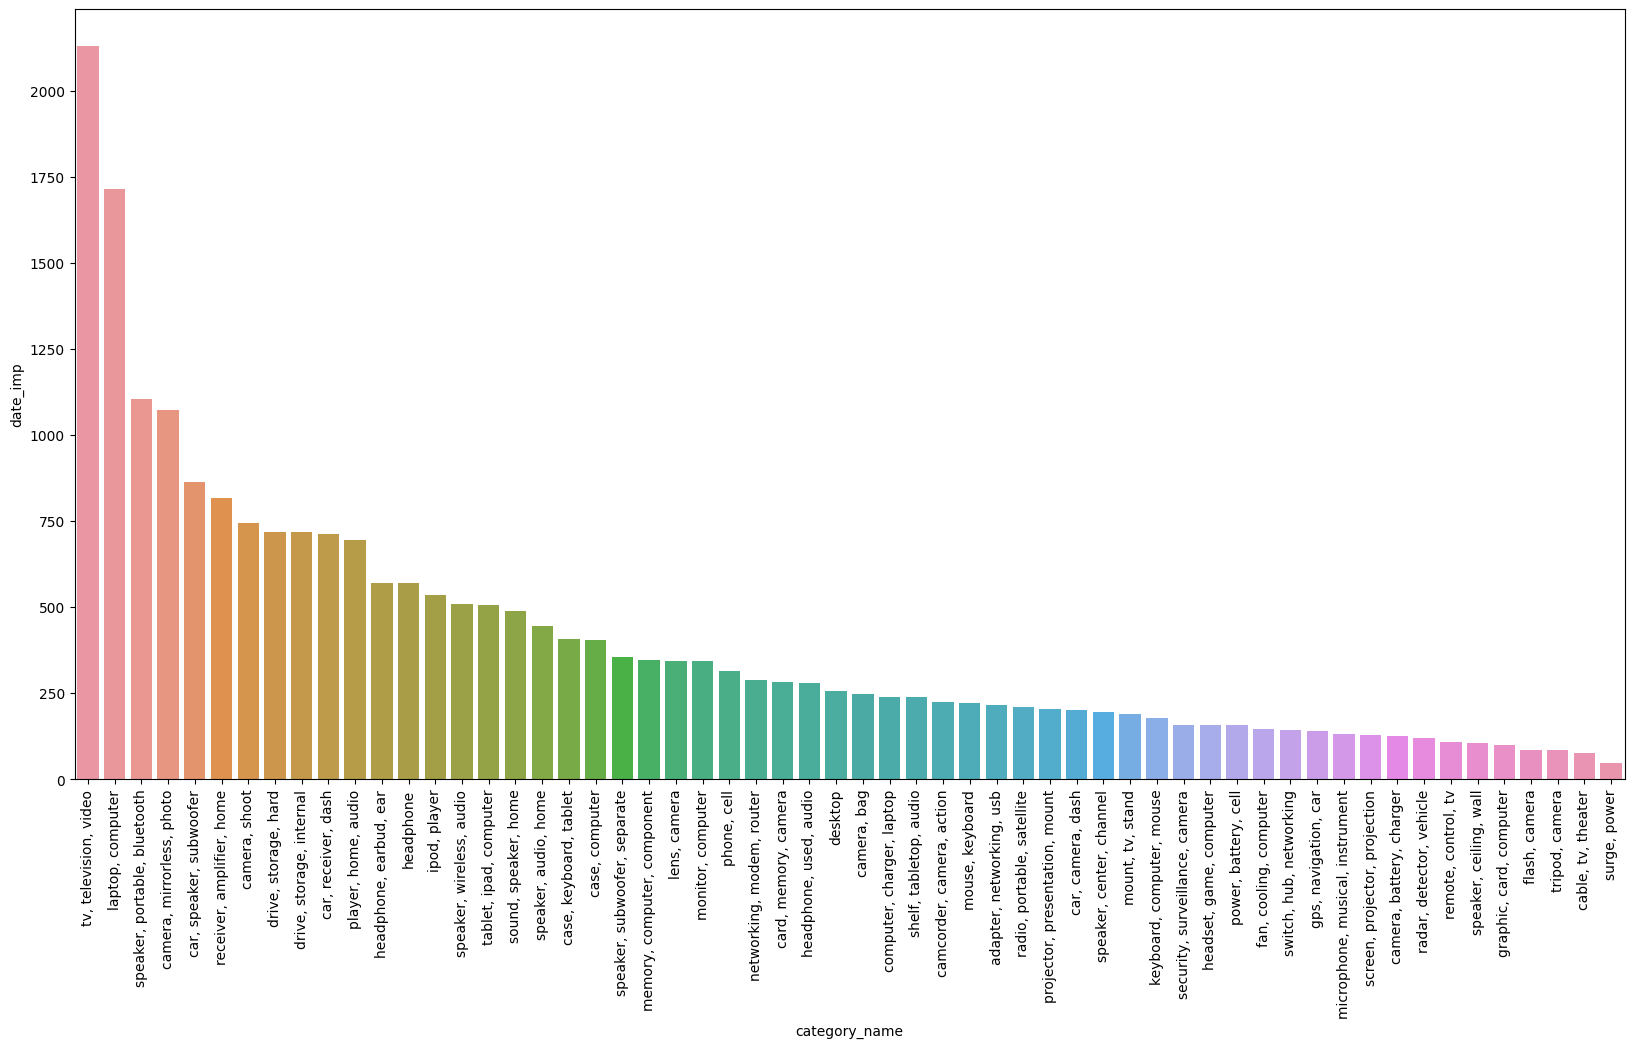

In [18]:
plt.figure(figsize=(20,10))
aux2 = df2[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp', data=aux2)

### 2.2.1 Categorias mais vendidas por loja

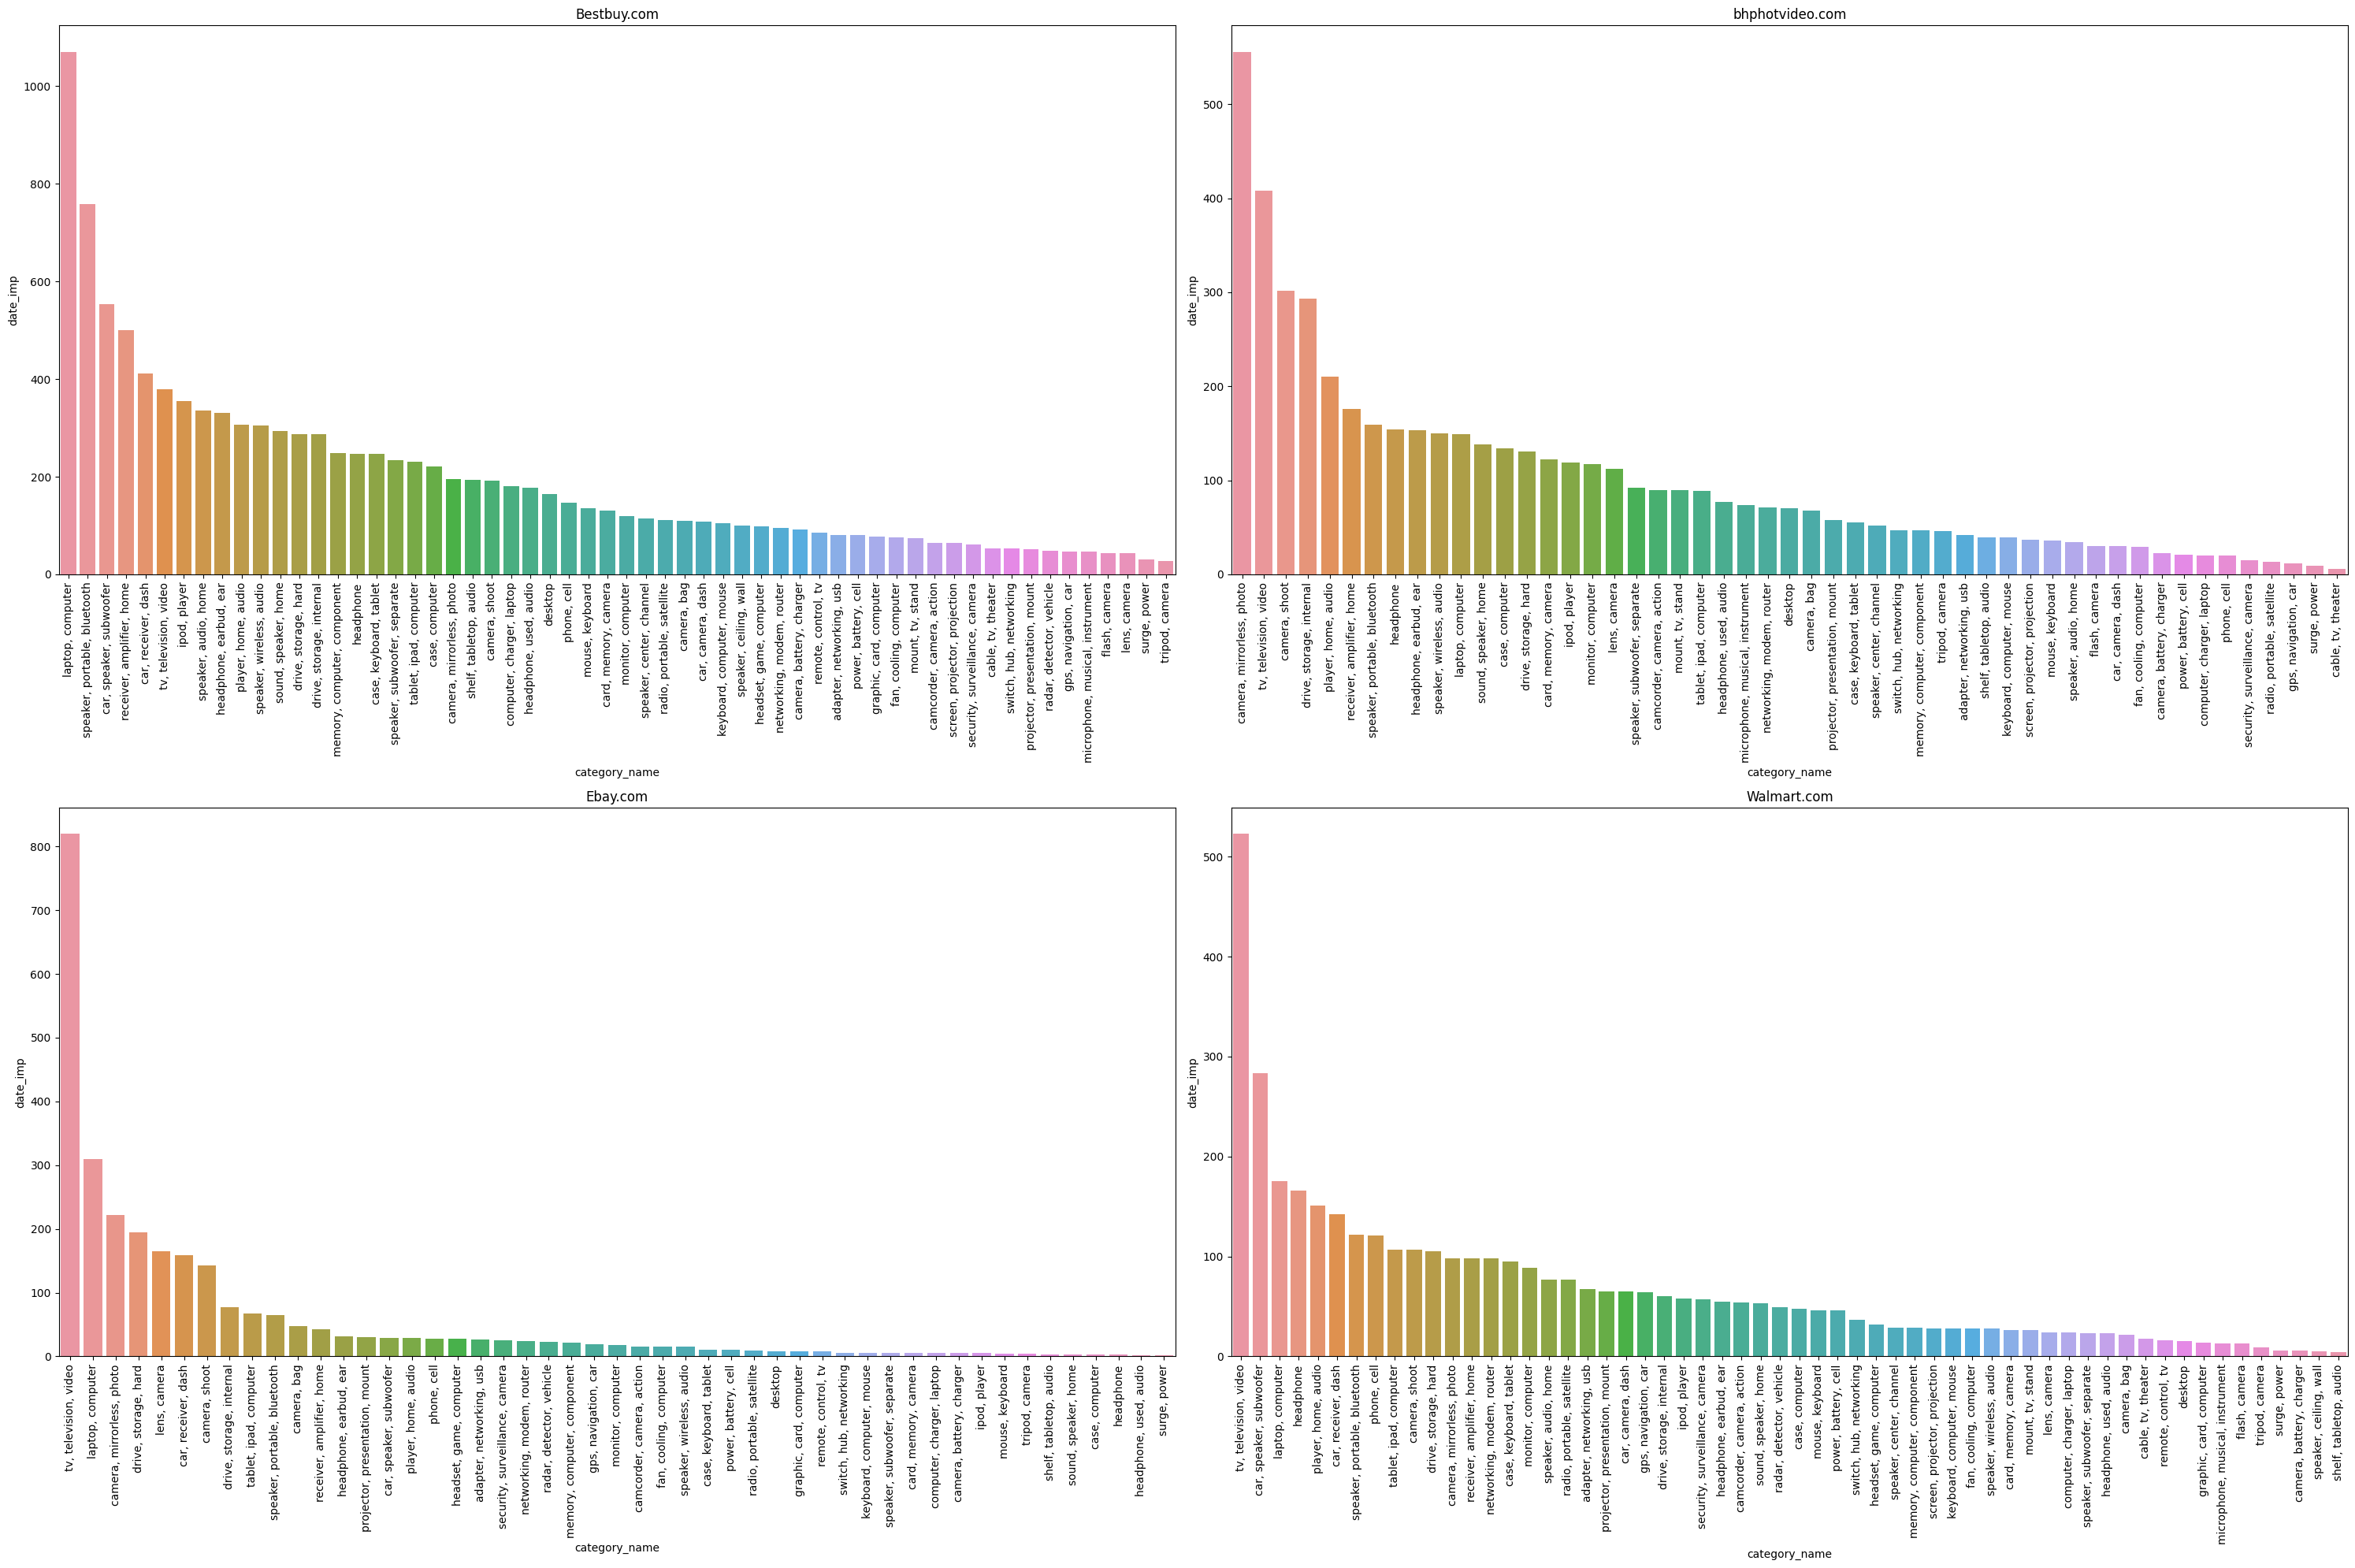

In [19]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux3 = df_best[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(x='category_name', y='date_imp', data=aux3)

plt.subplot(2,2,2)
aux4 = df_bhp[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('bhphotvideo.com')
sns.barplot(x='category_name', y='date_imp', data=aux4)

plt.subplot(2,2,3)
aux5 = df_ebay[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay.com')
sns.barplot(x='category_name', y='date_imp', data=aux5)

plt.subplot(2,2,4)
aux6 = df_walmart[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart.com')
sns.barplot(x='category_name', y='date_imp', data=aux6)

plt.tight_layout()

## 2.3 Qual a marca mais vendida?

### 2.3 Qual a marca mais vendida no geral

<AxesSubplot:xlabel='brand', ylabel='date_imp'>

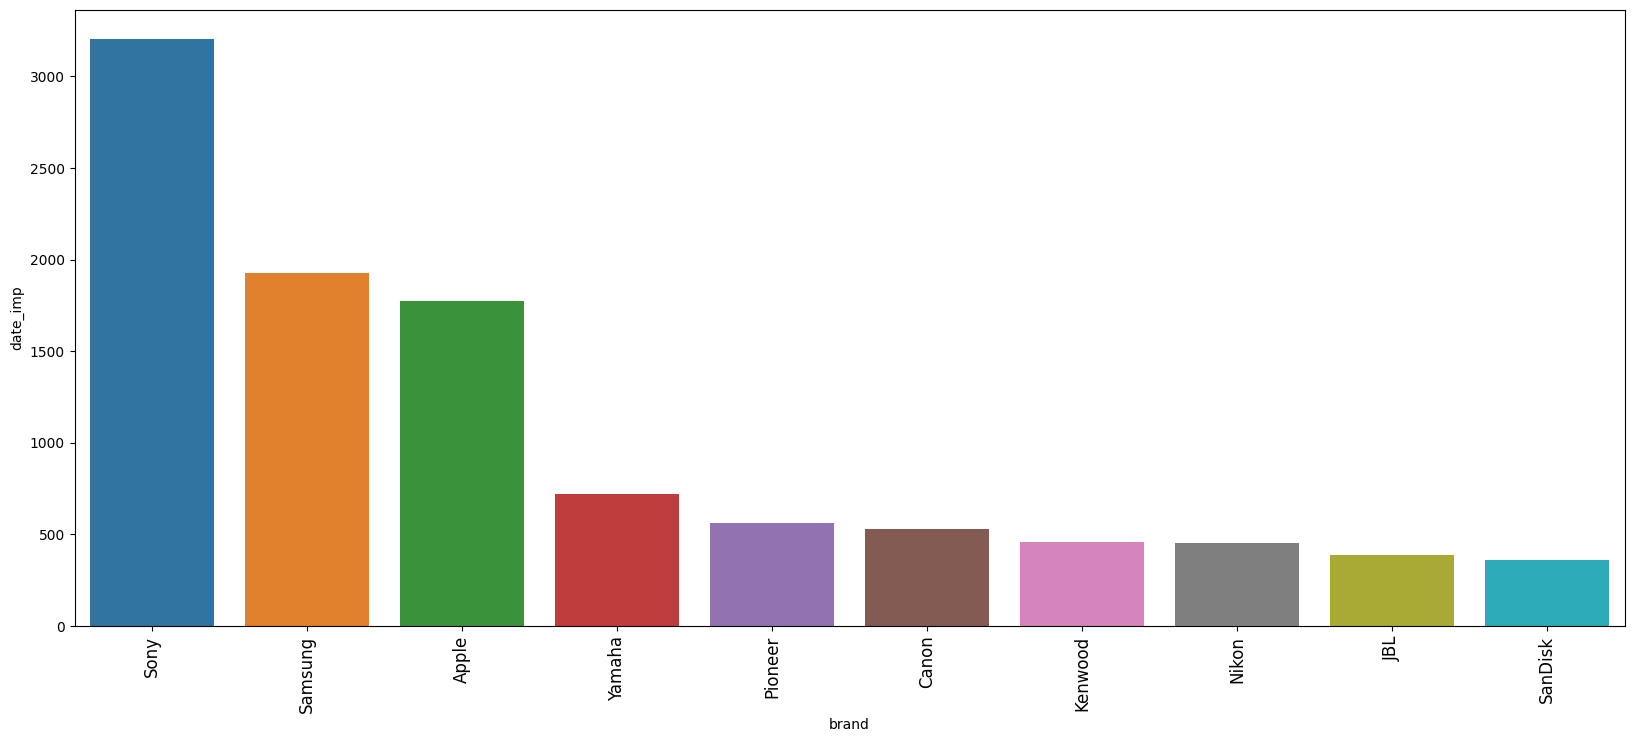

In [20]:
plt.figure(figsize=(20,8))
aux7 = df2[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='brand', y='date_imp', data=aux7.head(10))

### 2.4 Qual a marca mais vendida por loja

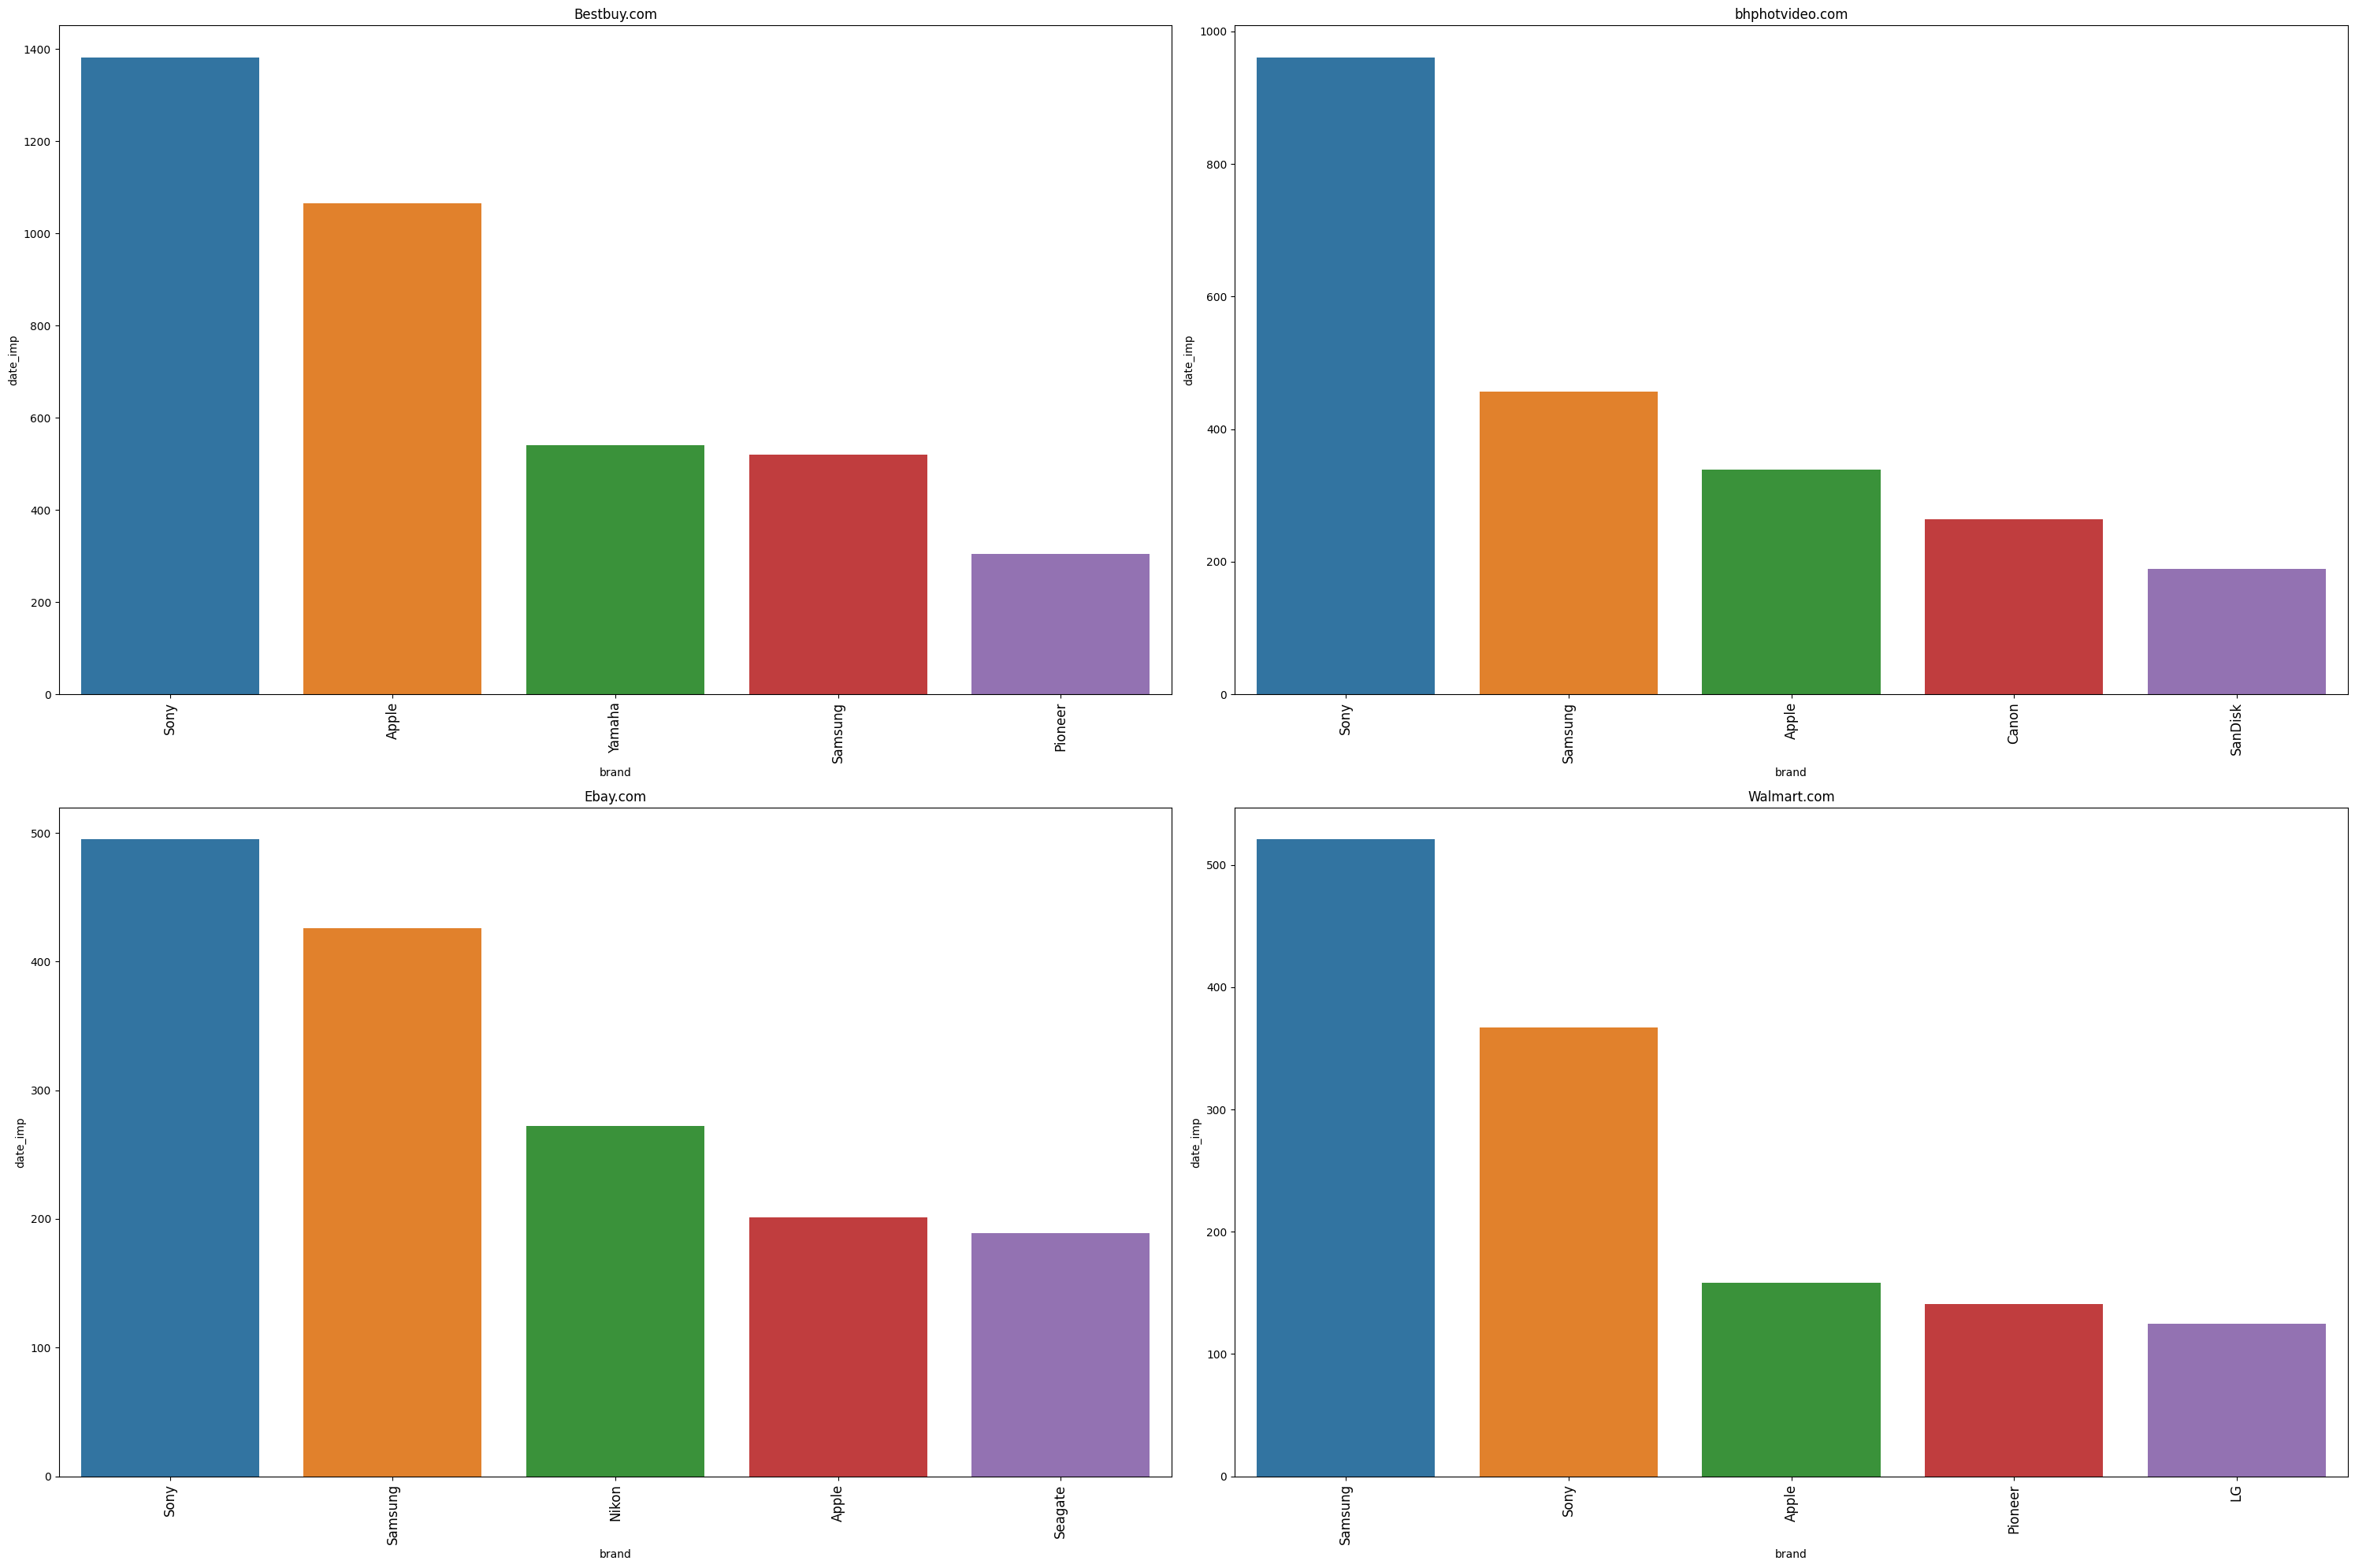

In [21]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux8 = df_best[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(x='brand', y='date_imp', data=aux8.head())

plt.subplot(2,2,2)
aux9 = df_bhp[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(x='brand', y='date_imp', data=aux9.head())

plt.subplot(2,2,3)
aux10 = df_ebay[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(x='brand', y='date_imp', data=aux10.head())

plt.subplot(2,2,4)
aux11 = df_walmart[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(x='brand', y='date_imp', data=aux11.head())

plt.tight_layout()

## 2.4 Quais os dias que mais vendem?

<AxesSubplot:xlabel='day_n', ylabel='date_imp'>

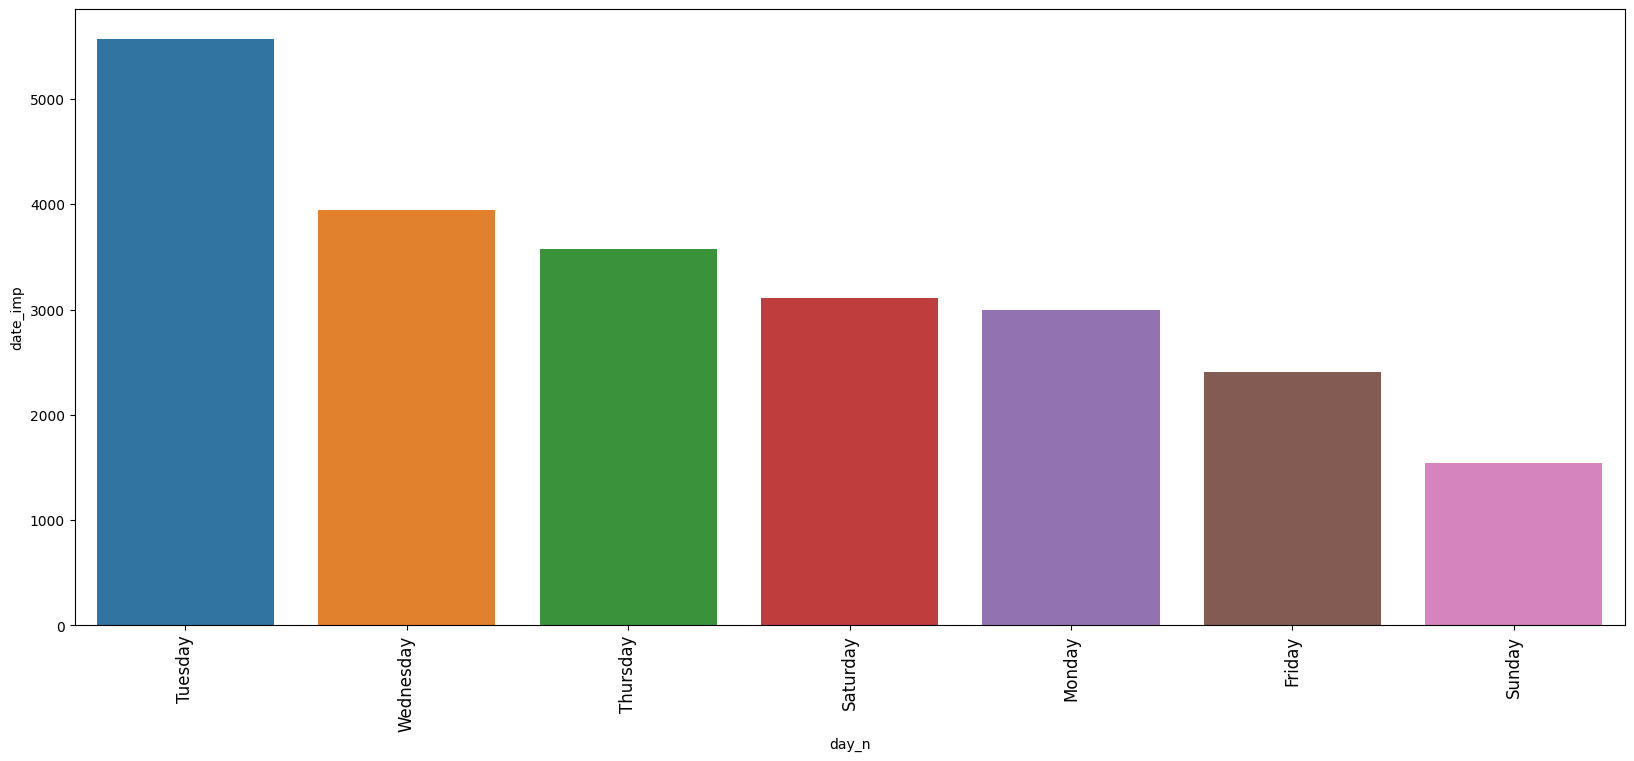

In [22]:
plt.figure(figsize=(20,8))
aux12 = df2[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='day_n', y='date_imp', data=aux12)

### 2.4.1 Quais os dias que mais vendem por loja

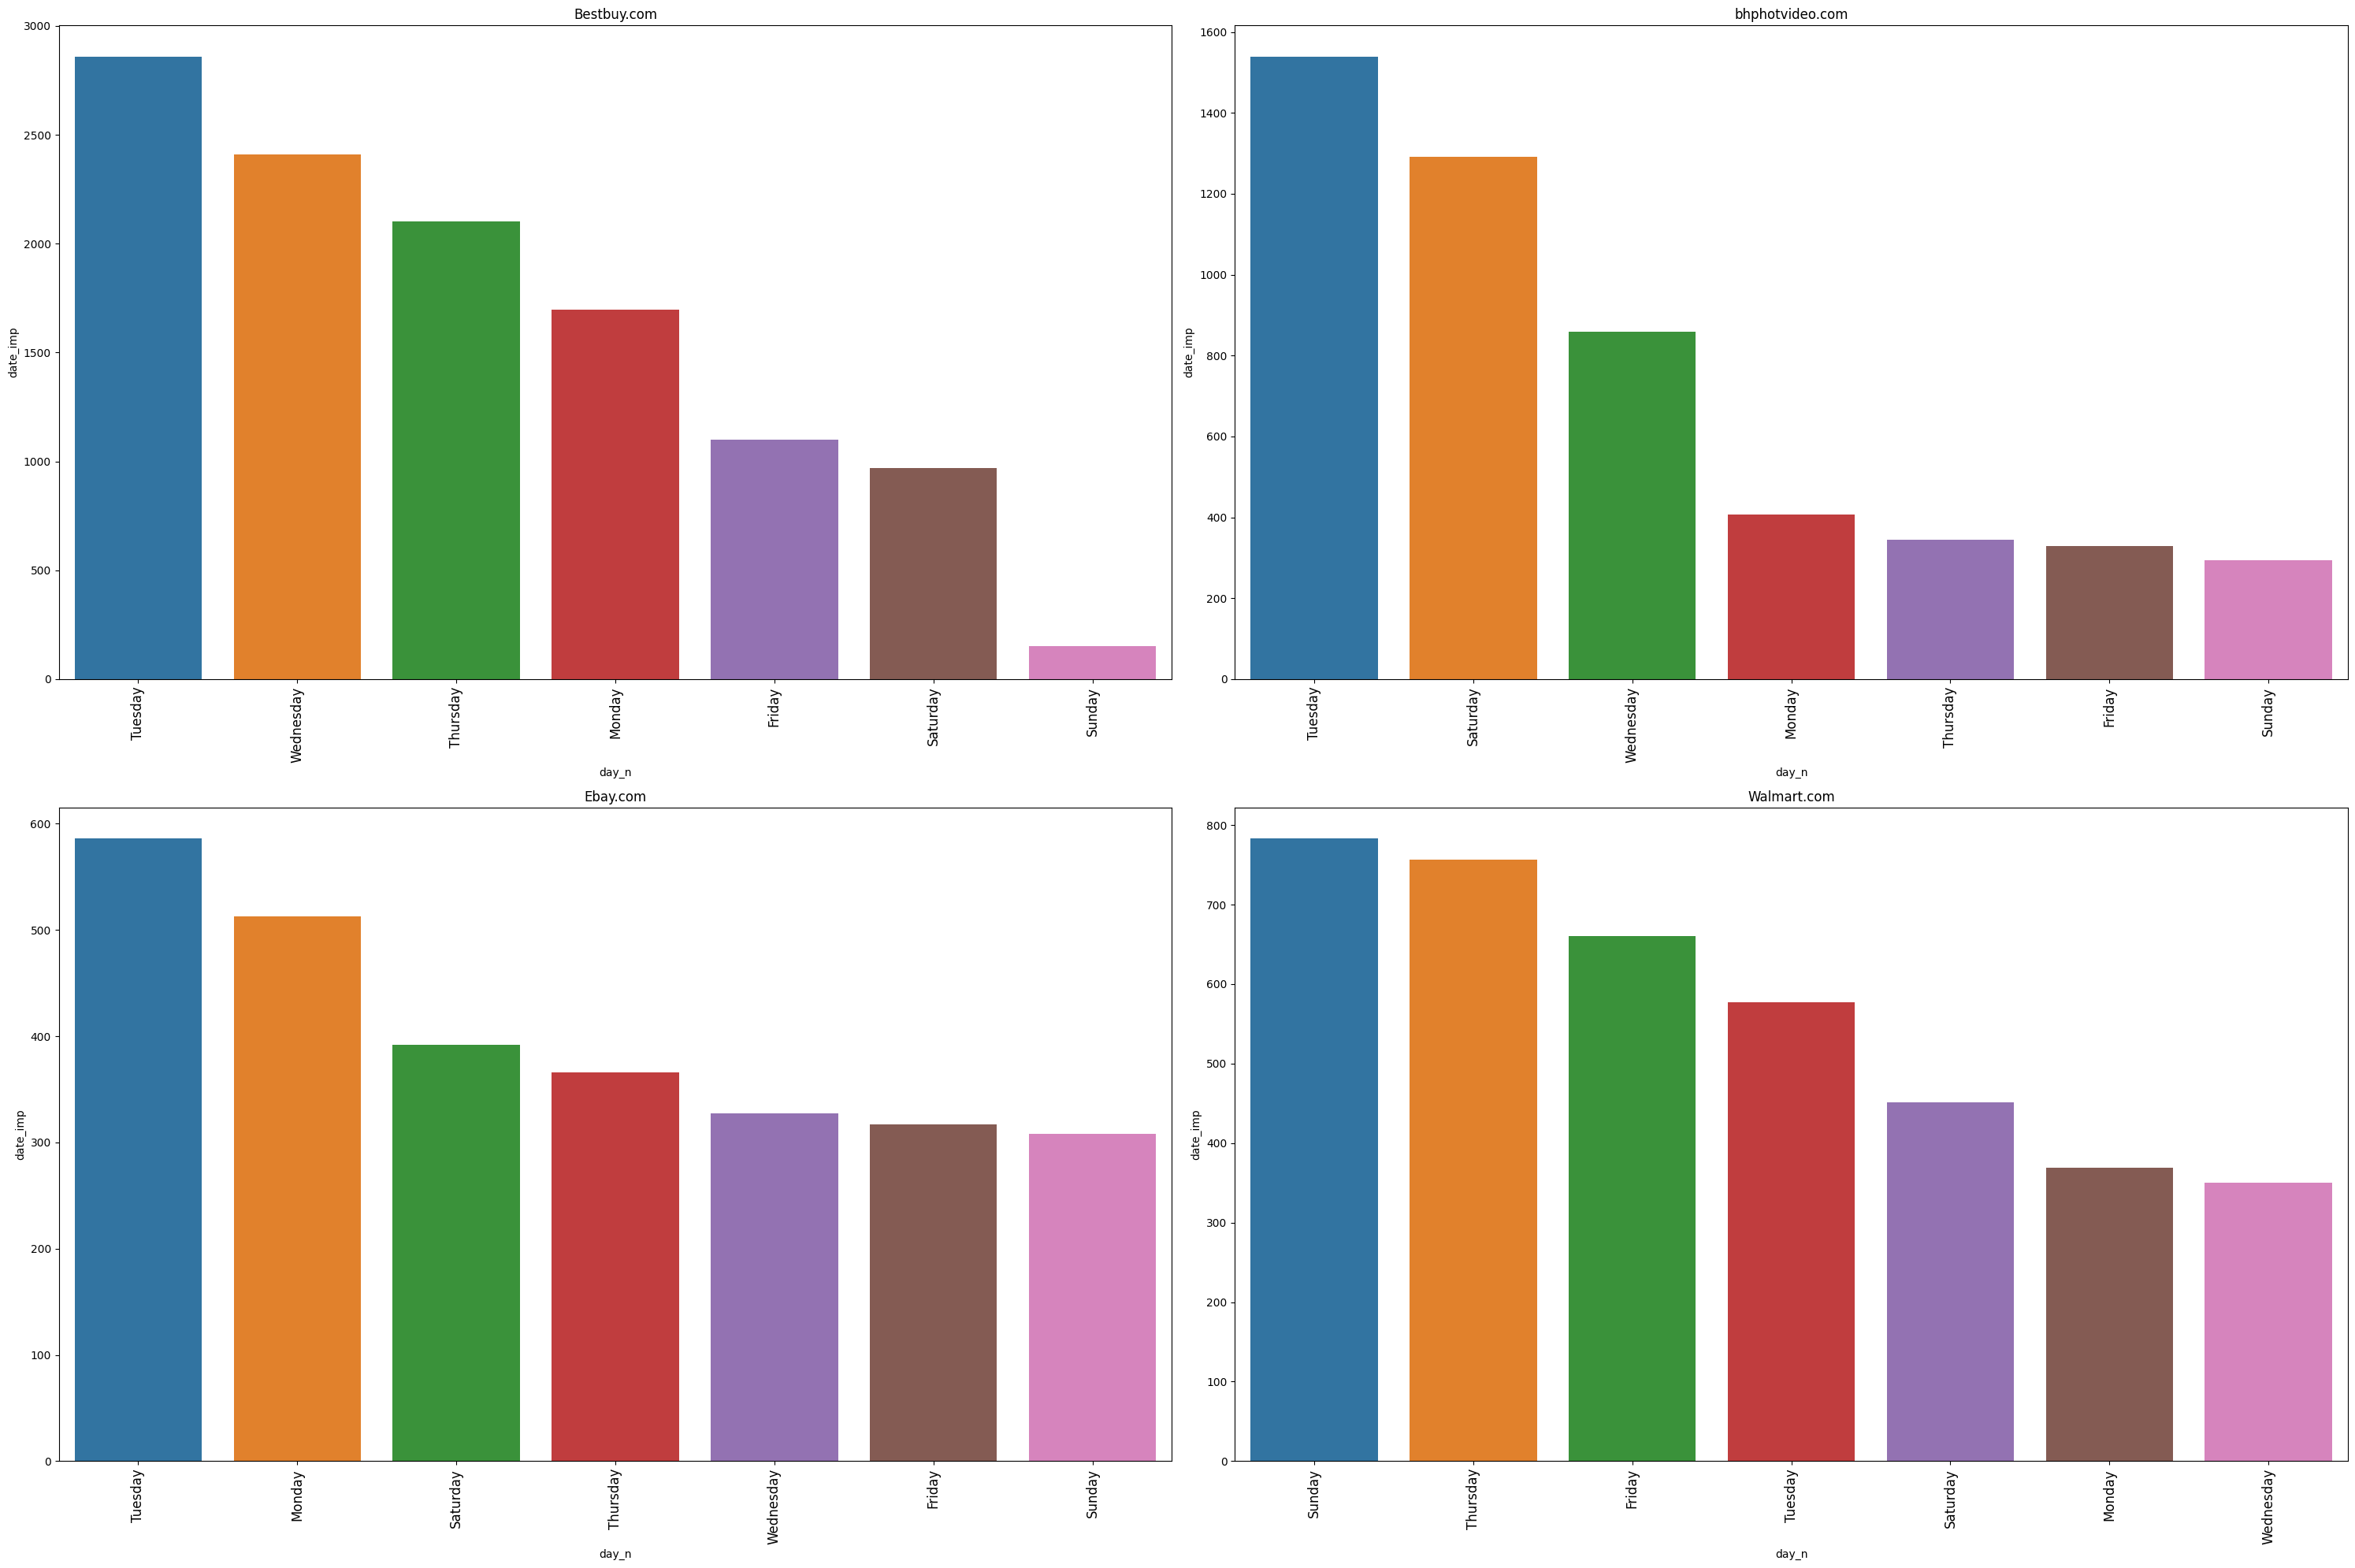

In [23]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux13 = df_best[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(x='day_n', y='date_imp', data=aux13)

plt.subplot(2,2,2)
aux14 = df_bhp[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(x='day_n', y='date_imp', data=aux14)

plt.subplot(2,2,3)
aux15 = df_ebay[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(x='day_n', y='date_imp', data=aux15)

plt.subplot(2,2,4)
aux16 = df_walmart[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(x='day_n', y='date_imp', data=aux16)

plt.tight_layout()

## 2.5 Quais os meses que mais vendem

<AxesSubplot:xlabel='month_n', ylabel='date_imp'>

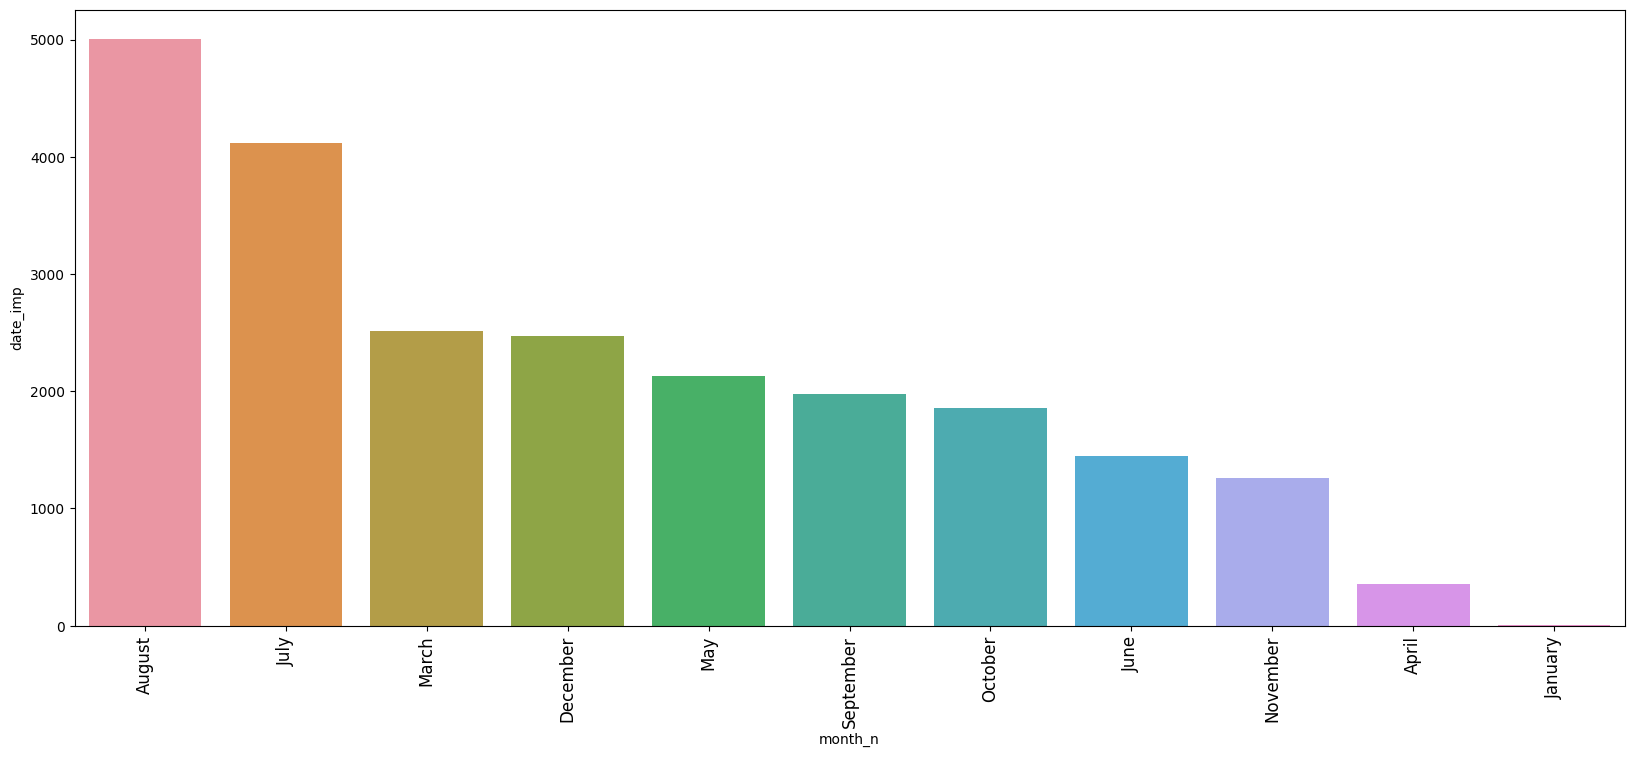

In [24]:
plt.figure(figsize=(20,8))
aux17 = df2[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='month_n', y='date_imp', data=aux17)

### 2.4.1 Quais os meses que mais vendem por loja

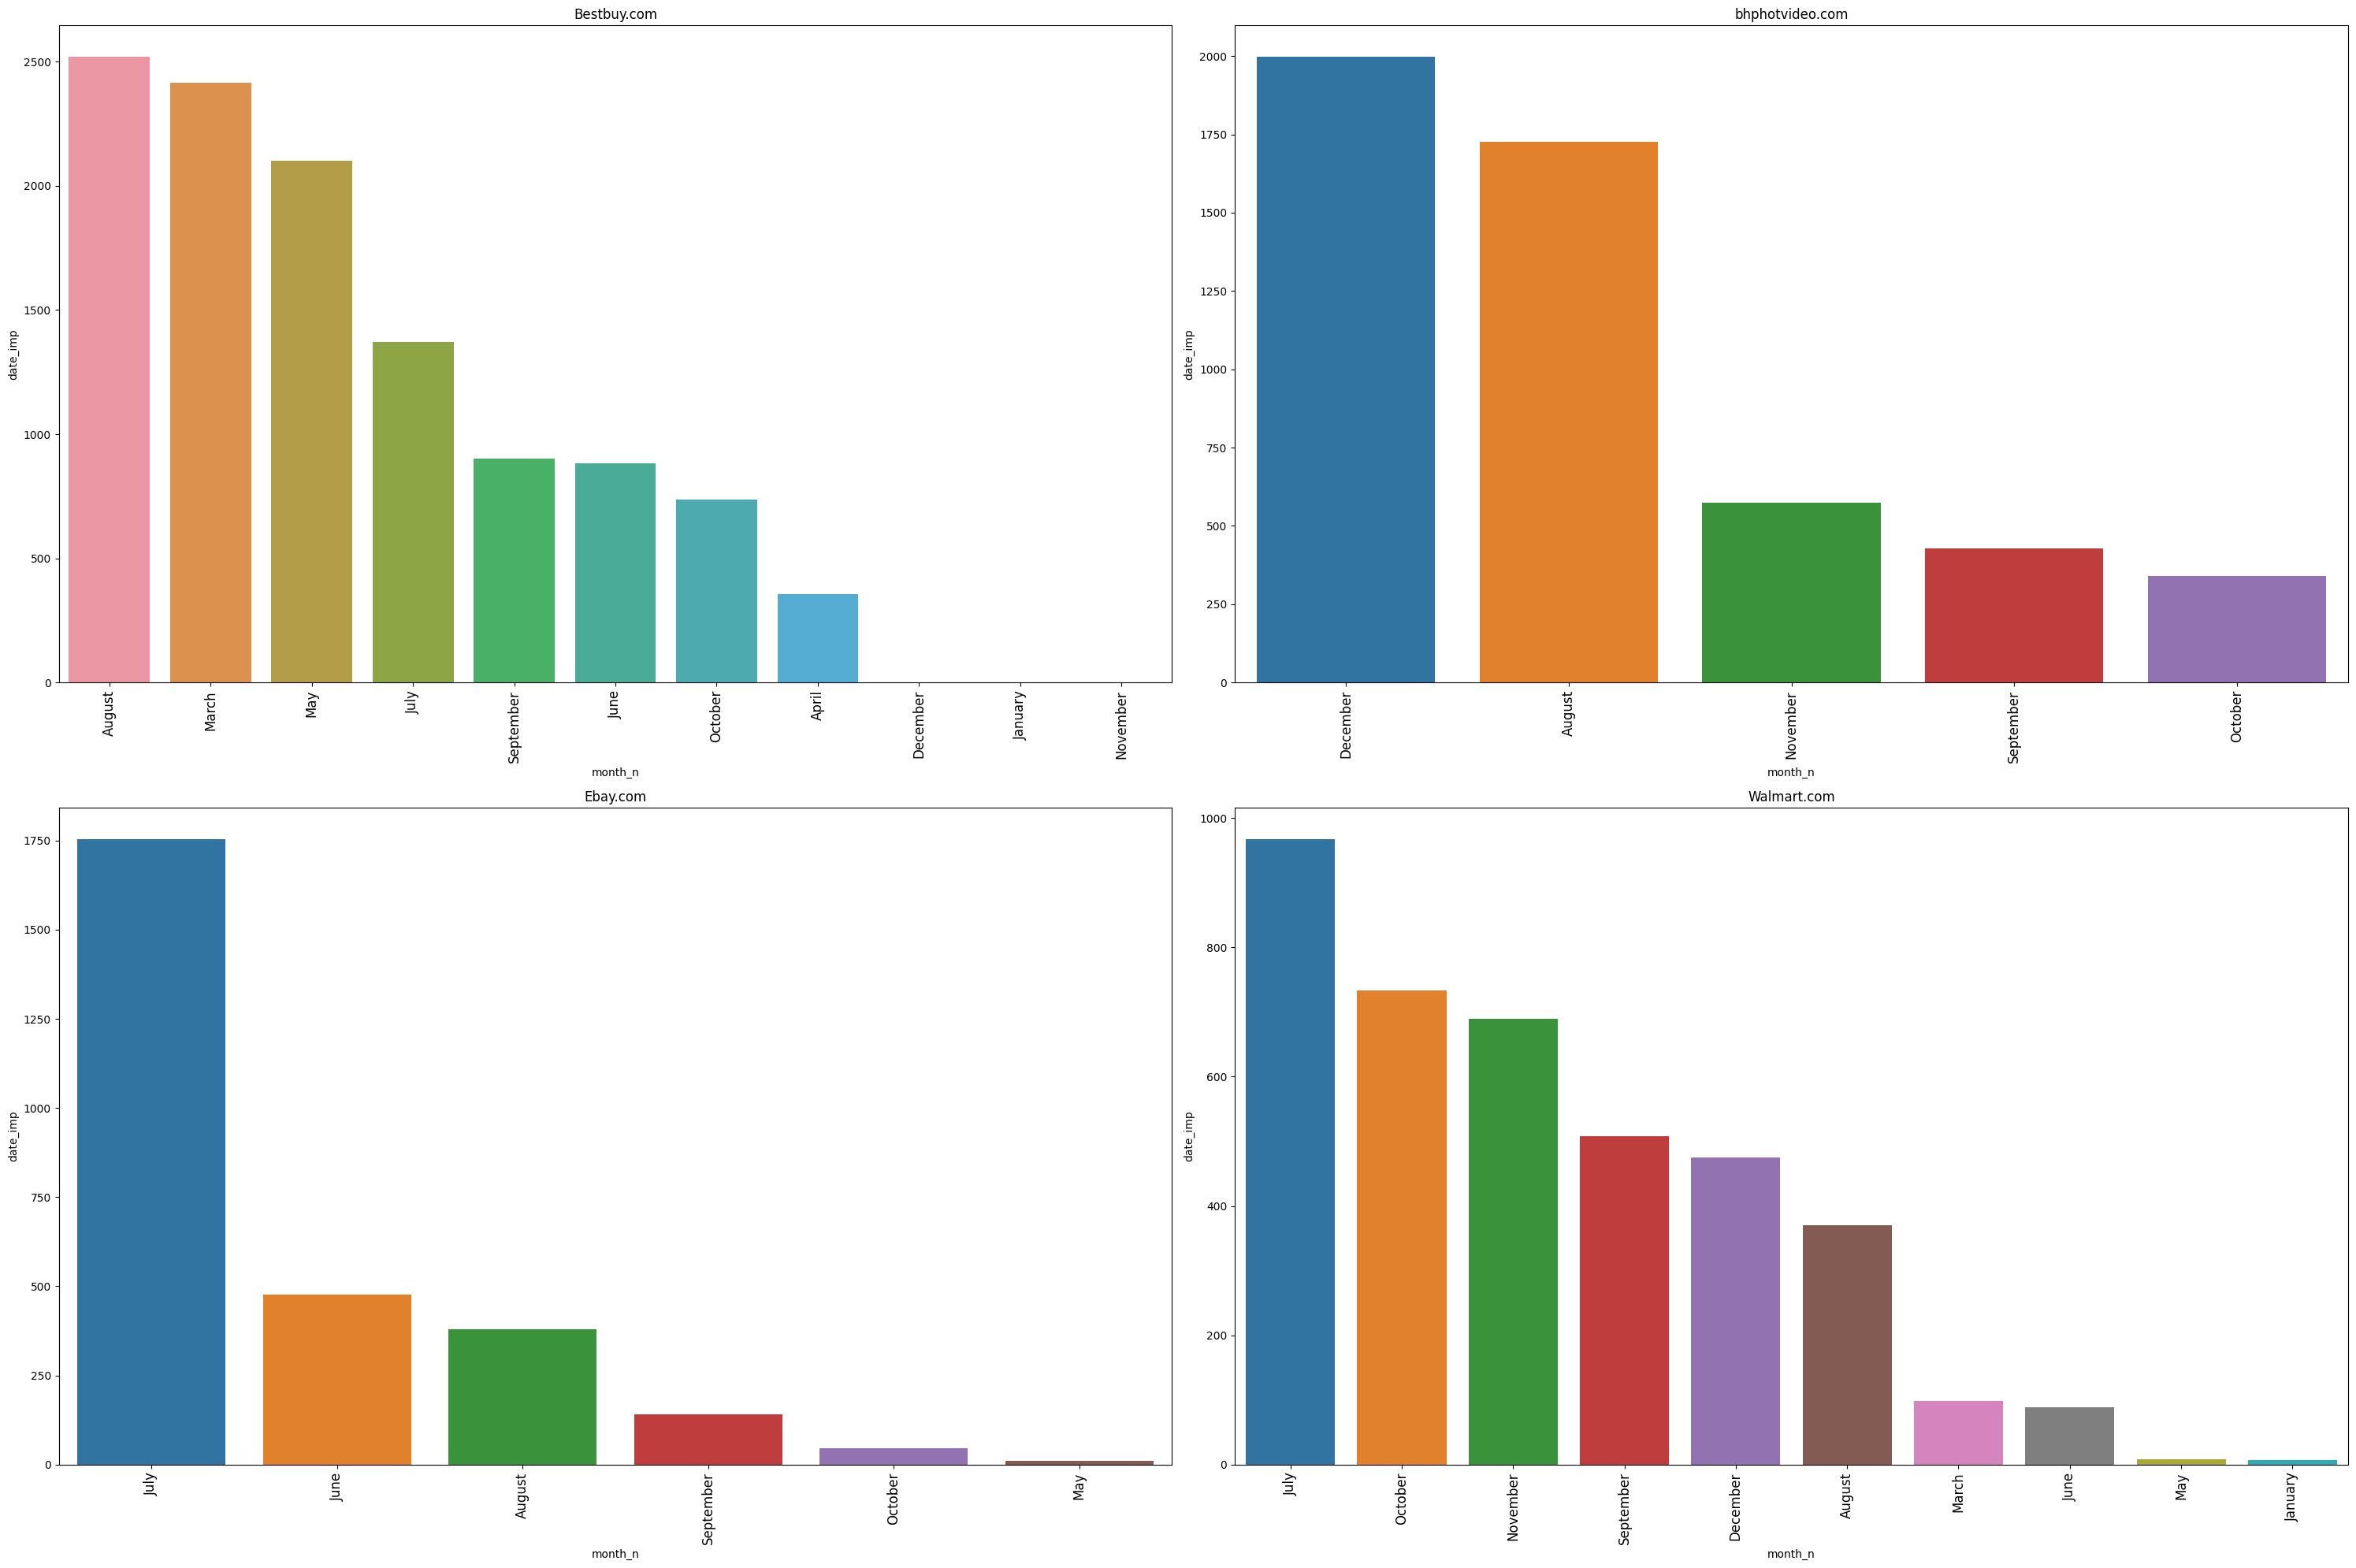

In [25]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux18 = df_best[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(x='month_n', y='date_imp', data=aux18)

plt.subplot(2,2,2)
aux19 = df_bhp[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(x='month_n', y='date_imp', data=aux19)

plt.subplot(2,2,3)
aux20 = df_ebay[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(x='month_n', y='date_imp', data=aux20)

plt.subplot(2,2,4)
aux21 = df_walmart[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(x='month_n', y='date_imp', data=aux21)

plt.tight_layout()

In [26]:
df2.columns

Index(['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant',
       'disc_percentage', 'is_sale', 'imp_count', 'brand', 'p_description',
       'dateadded', 'dateseen', 'dateupdated', 'manufacturer', 'day_n',
       'month', 'month_n', 'day', 'week_number'],
      dtype='object')

## 2.5 Quais as semanas que mais vendem

<AxesSubplot:xlabel='week_number', ylabel='date_imp'>

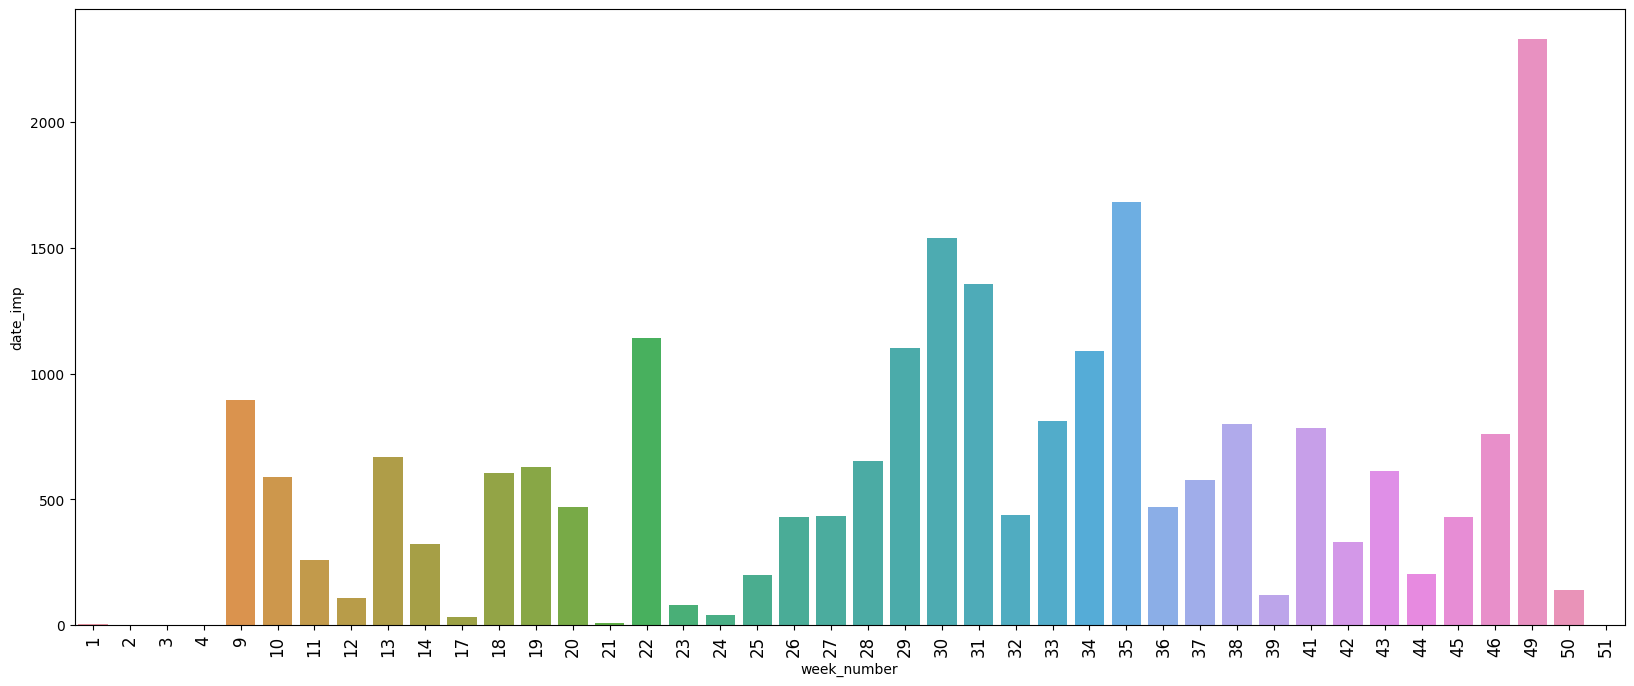

In [27]:
plt.figure(figsize=(20,8))
aux22 = df2[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='week_number', y='date_imp', data=aux22)

### 2.5.1 Quais os semanas que mais vendem por loja

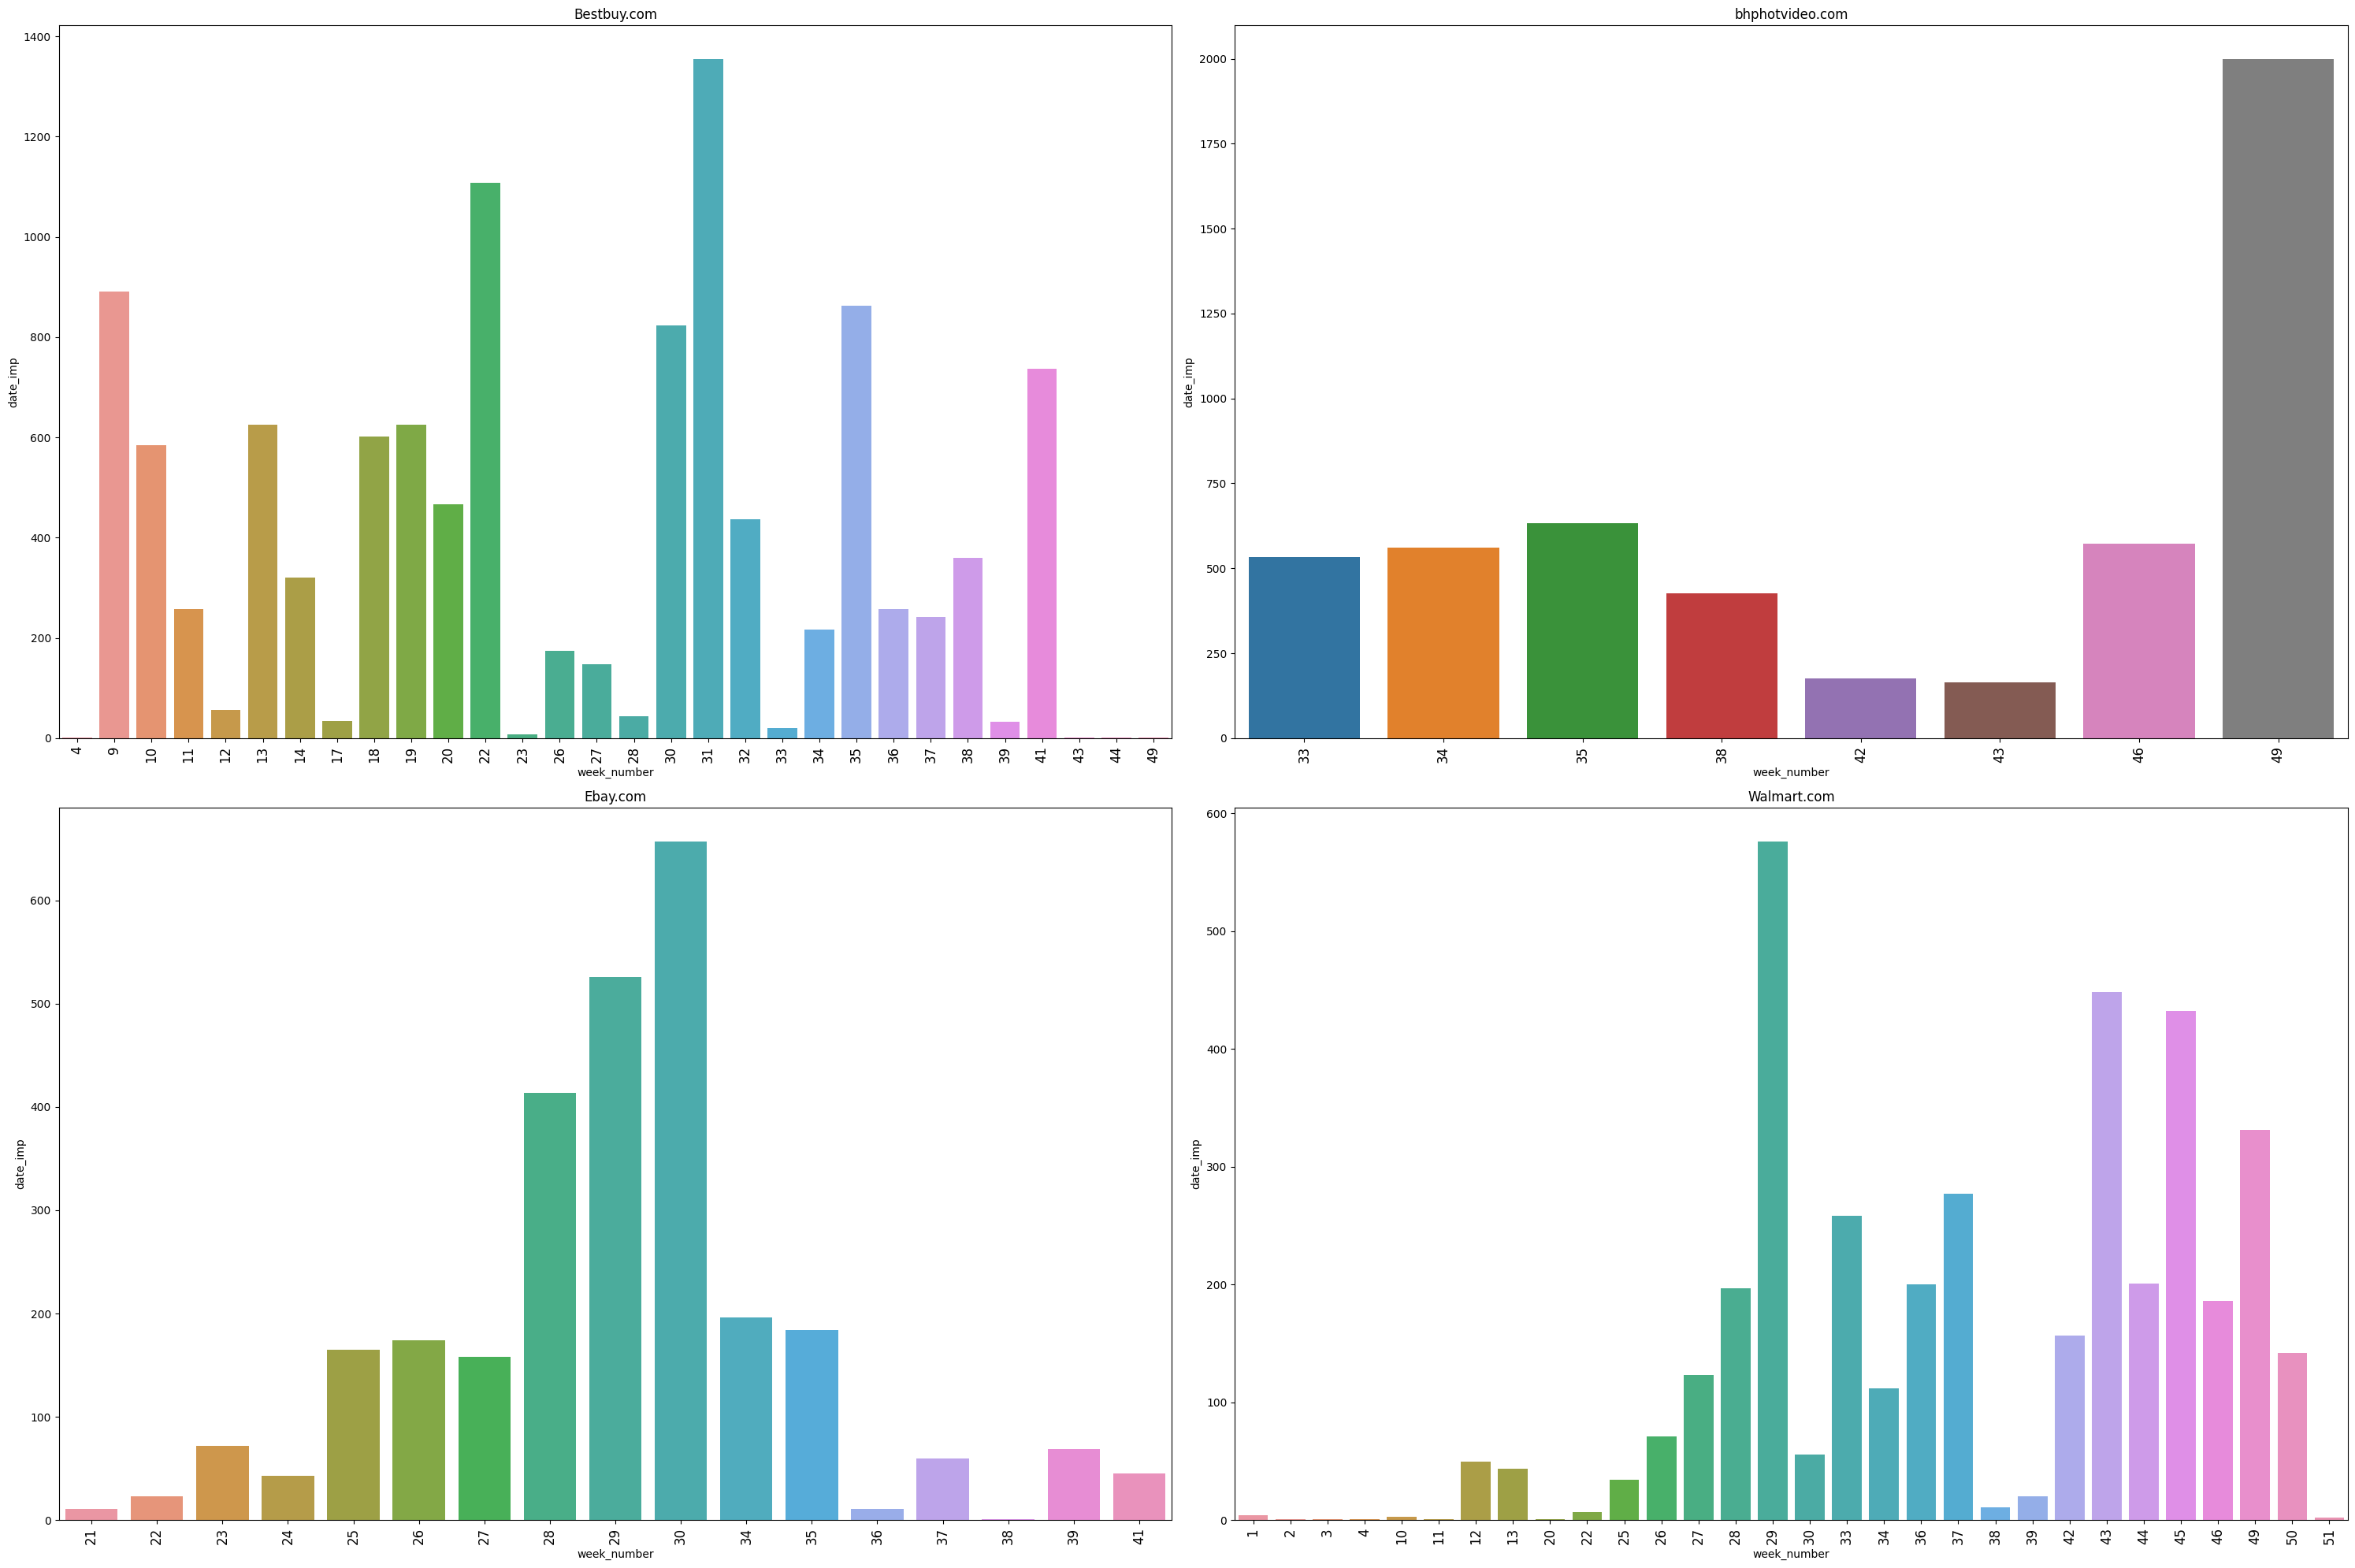

In [28]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux23 = df_best[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(x='week_number', y='date_imp', data=aux23)

plt.subplot(2,2,2)
aux24 = df_bhp[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(x='week_number', y='date_imp', data=aux24)

plt.subplot(2,2,3)
aux25 = df_ebay[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(x='week_number', y='date_imp', data=aux25)

plt.subplot(2,2,4)
aux26 = df_walmart[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(x='week_number', y='date_imp', data=aux26)

plt.tight_layout()

# 3.0 Feature Engineering

In [20]:
df3 = df2.copy()

## 3.1 Categoria mais vendida da Bestuy.com

In [23]:
df_laptop = df_best[df_best['category_name'] == 'laptop, computer']

In [24]:
# check NA
df_laptop.isna().sum()

date_imp             0
category_name        0
name                 0
price                0
disc_price           0
merchant             0
disc_percentage      0
is_sale              0
imp_count            0
brand                0
p_description        0
dateadded            0
dateseen             0
dateupdated          0
manufacturer       627
day_n                0
month                0
month_n              0
day                  0
week_number          0
dtype: int64

In [25]:
test = df_laptop.groupby(['name', 'week_number']).agg({'disc_price': 'mean', 'date_imp': 'count'}).reset_index()
test.head()

name  week_number  disc_price  date_imp
0  12 MacBook (Mid 2017, Gold)           30     1599.99         1
1  12 MacBook (Mid 2017, Gold)           31     1551.99         8
2  12 MacBook (Mid 2017, Gold)           33     1454.99         2
3  12 MacBook (Mid 2017, Gold)           34     1551.99         2
4  12 MacBook (Mid 2017, Gold)           35     1474.49         4

In [26]:
#criando dataframe dos valores(x)
x_price = test.pivot(index= 'week_number' , columns= 'name', values='disc_price')
x_price = pd.DataFrame(x_price.to_records())
x_price.head()

week_number  12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
0            4                          NaN                            NaN   
1            9                          NaN                            NaN   
2           10                          NaN                            NaN   
3           11                          NaN                            NaN   
4           13                          NaN                            NaN   

   12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
0                                           NaN   
1                                       426.495   
2                                       426.495   
3                                           NaN   
4                                       449.000   

   13.3 MacBook Air (Mid 2017, Silver)  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
0                                                NaN     
1                                            2799.99     
2                                            2799.99     
3                                            2715.99     
4                                            2547.99     

   15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
0                                                NaN         
1                                            2599.99         
2                                            2599.99         
3                                            2482.99         
4                                            2353.99         

   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

   Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
0                                                NaN                                                                                        
1                                             899.99                                                                                        
2                                             899.99                                                                                        
3                                                NaN                                                                                        
4                                             849.99                                                                                        

   Acer 15.6 Chromebook CB5-571-C4G4  ...  \
0                                NaN  ...   
1                            236.495  ...   
2                            238.995  ...   
3                                NaN  ...   
4                            223.995  ...   

   HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"  \
0                                                NaN                                 
1                                             799.99                                 
2                                             819.99                                 
3                                             819.99                                 
4                                             819.99               

In [27]:
x_price

week_number  12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
0             4                          NaN                            NaN   
1             9                          NaN                            NaN   
2            10                          NaN                            NaN   
3            11                          NaN                            NaN   
4            13                          NaN                            NaN   
5            14                          NaN                            NaN   
6            18                          NaN                            NaN   
7            19                          NaN                            NaN   
8            20                          NaN                            NaN   
9            22                          NaN                            NaN   
10           26                          NaN                            NaN   
11           27                          NaN                            NaN   
12           28                          NaN                            NaN   
13           30                      1599.99                        1299.99   
14           31                      1551.99                        1299.99   
15           32                          NaN                            NaN   
16           33                      1454.99                            NaN   
17           34                      1551.99                        1299.99   
18           35                      1474.49                        1234.99   
19           36                      1551.99                        1299.99   
20           37                      1551.99                        1299.99   
21           38                      1551.99                        1299.99   
22           41                      1551.99                        1260.99   
23           43                          NaN                            NaN   
24           44                          NaN                            NaN   
25           49                          NaN                            NaN   

    12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
0                                            NaN   
1                                        426.495   
2                                        426.495   
3                                            NaN   
4                                        449.000   
5                                        408.495   
6                                        426.495   
7                                        399.995   
8                                        426.495   
9                                        413.990   
10                                           NaN   
11                                           NaN   
12                                           NaN   
13                                       415.495   
14                                       372.995   
15                                       386.995   
16                                           NaN   
17                                           NaN   
18                                       372.995   
19                                           NaN   
20                                           NaN   
21                                           NaN   
22                                       415.495   
23                                           NaN   
24                                           NaN   
25                                           NaN   

    13.3 MacBook Air (Mid 2017, Silver)  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   
5                                   NaN   
6                                   NaN   
7                                   NaN   
8                                   NaN   
9                                  

In [34]:
y_demand = test.pivot(index= 'week_number' , columns= 'name', values='date_imp')
y_demand = pd.DataFrame(y_demand.to_records())
y_demand.head()

week_number  12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
0            4                          NaN                            NaN   
1            9                          NaN                            NaN   
2           10                          NaN                            NaN   
3           11                          NaN                            NaN   
4           13                          NaN                            NaN   

   12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
0                                           NaN   
1                                           4.0   
2                                           2.0   
3                                           NaN   
4                                           1.0   

   13.3 MacBook Air (Mid 2017, Silver)  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
0                                                NaN     
1                                                3.0     
2                                                1.0     
3                                                2.0     
4                                                2.0     

   15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
0                                                NaN         
1                                                6.0         
2                                                4.0         
3                                                4.0         
4                                                8.0         

   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

   Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
0                                                NaN                                                                                        
1                                                2.0                                                                                        
2                                                1.0                                                                                        
3                                                NaN                                                                                        
4                                                1.0                                                                                        

   Acer 15.6 Chromebook CB5-571-C4G4  ...  \
0                                NaN  ...   
1                                4.0  ...   
2                                2.0  ...   
3                                NaN  ...   
4                                2.0  ...   

   HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"  \
0                                                NaN                                 
1                                                1.0                                 
2                                                1.0                                 
3                                                1.0                                 
4                                                1.0               

# Descrição dos novos dataframes

# 4.0 Descrição dos dados

In [35]:
# 4.1 Data Dimension

In [36]:
print(f'Number of rows: {x_price.shape[0]}')
print(f'Number of columns: {x_price.shape[1]}')

Number of rows: 26
Number of columns: 40


In [37]:
print(f'Number of rows: {y_demand.shape[0]}')
print(f'Number of columns: {y_demand.shape[1]}')

Number of rows: 26
Number of columns: 40


## 4.2 Data Types

In [38]:
x_price.dtypes

week_number                                                                                                                                                                                              int64
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                         

In [39]:
y_demand.dtypes

week_number                                                                                                                                                                                              int64
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                         

## 4.3 Check NA

In [40]:
x_price.isna().sum()

week_number                                                                                                                                                                                             0
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                             

In [41]:
y_demand.isna().sum()

week_number                                                                                                                                                                                             0
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                             

## 4.5 Replace NA

In [42]:
a = np.round(x_price.median(), 2)
x_price.fillna(a, inplace=True)
x_price.head()

week_number  12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
0            4                      1551.99                        1299.99   
1            9                      1551.99                        1299.99   
2           10                      1551.99                        1299.99   
3           11                      1551.99                        1299.99   
4           13                      1551.99                        1299.99   

   12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
0                                       415.500   
1                                       426.495   
2                                       426.495   
3                                       415.500   
4                                       449.000   

   13.3 MacBook Air (Mid 2017, Silver)  \
0                               949.99   
1                               949.99   
2                               949.99   
3                               949.99   
4                               949.99   

   15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
0                                            2618.99     
1                                            2799.99     
2                                            2799.99     
3                                            2715.99     
4                                            2547.99     

   15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
0                                            2353.99         
1                                            2599.99         
2                                            2599.99         
3                                            2482.99         
4                                            2353.99         

   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
0                                             304.99                                                     
1                                             304.99                                                     
2                                             304.99                                                     
3                                             304.99                                                     
4                                             304.99                                                     

   Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
0                                             829.99                                                                                        
1                                             899.99                                                                                        
2                                             899.99                                                                                        
3                                             829.99                                                                                        
4                                             849.99                                                                                        

   Acer 15.6 Chromebook CB5-571-C4G4  ...  \
0                            249.000  ...   
1                            236.495  ...   
2                            238.995  ...   
3                            249.000  ...   
4                            223.995  ...   

   HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"  \
0                                             819.99                                 
1                                             799.99                                 
2                                             819.99                                 
3                                             819.99                                 
4                                             819.99               

In [43]:
y_demand.fillna(0, inplace=True)
y_demand.head()

week_number  12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
0            4                          0.0                            0.0   
1            9                          0.0                            0.0   
2           10                          0.0                            0.0   
3           11                          0.0                            0.0   
4           13                          0.0                            0.0   

   12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
0                                           0.0   
1                                           4.0   
2                                           2.0   
3                                           0.0   
4                                           1.0   

   13.3 MacBook Air (Mid 2017, Silver)  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
0                                                0.0     
1                                                3.0     
2                                                1.0     
3                                                2.0     
4                                                2.0     

   15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
0                                                0.0         
1                                                6.0         
2                                                4.0         
3                                                4.0         
4                                                8.0         

   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
0                                                0.0                                                     
1                                                0.0                                                     
2                                                0.0                                                     
3                                                0.0                                                     
4                                                0.0                                                     

   Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
0                                                0.0                                                                                        
1                                                2.0                                                                                        
2                                                1.0                                                                                        
3                                                0.0                                                                                        
4                                                1.0                                                                                        

   Acer 15.6 Chromebook CB5-571-C4G4  ...  \
0                                0.0  ...   
1                                4.0  ...   
2                                2.0  ...   
3                                0.0  ...   
4                                2.0  ...   

   HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"  \
0                                                0.0                                 
1                                                1.0                                 
2                                                1.0                                 
3                                                1.0                                 
4                                                1.0               

# 4.6 Descriptive Statistics

In [44]:
# central tendency
ct1_x = pd.DataFrame(x_price.apply(np.mean) ).T   # média
ct2_x = pd.DataFrame(x_price.apply(np.median) ).T  # mediana

# dispersion
d1_x = pd.DataFrame(x_price.apply(np.std) ).T # Desvio padrão
d2_x = pd.DataFrame(x_price.apply(min) ).T # valor mínimo
d3_x = pd.DataFrame(x_price.apply(max) ).T # valor máximo
d4_x = pd.DataFrame(x_price.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5_x = pd.DataFrame(x_price.apply( lambda x: x.skew())).T #skewness
d6_x = pd.DataFrame(x_price.apply( lambda x : x.kurtosis())).T # kurtosis

m_x = pd.concat( [d2_x, d3_x, d4_x, ct1_x, ct2_x, d1_x, d5_x, d6_x]).T.reset_index()
m_x.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m_x

att       min      max  \
0                                         week_number     4.000    49.00   
1                         12 MacBook (Mid 2017, Gold)  1454.990  1599.99   
2                       12 MacBook (Mid 2017, Silver)  1234.990  1299.99   
3        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus   372.995   449.00   
4                 13.3 MacBook Air (Mid 2017, Silver)   911.990   969.99   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Si...  2327.990  2799.99   
6   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...  2023.990  2599.99   
7   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...   237.490   313.49   
8   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...   764.990   899.99   
9                   Acer 15.6 Chromebook CB5-571-C4G4   199.990   249.00   
10  Alienware - R3 17.3 Laptop - Intel Core i7 - 1...  1599.990  1899.99   
11  Apple - MacBook Pro® - 13 Display - Intel Core...  1315.990  1454.99   
12  Apple - MacBook Pro® - 13 Display - Intel Core...  1315.990  1454.99   
13  Apple - MacBook Pro® - 13 Display - Intel Core...  1794.490  1999.99   
14                  Apple 13.3 MacBook Air ( Silver)"   600.495  1234.99   
15  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...  1079.990  1519.99   
16  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...   700.495  1432.49   
17  Apple MacBook Pro with Touch Bar - 13.3 - Core...  1610.740  1999.99   
18  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...  1091.990  1329.99   
19  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...   719.990   799.99   
20  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...   700.495  1399.99   
21  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...   900.495  2199.99   
22  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...  1349.990  1799.99   
23  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...  1601.990  1899.99   
24  Details About Apple Macbook Air 13.3 Laptop (e...   727.490   799.99   
25  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...   441.990   657.99   
26  Details About Dell Inspiron I75675650blkpus 15...   763.990   868.49   
27  Details About Openbox Excellent: Asus Rog Gl50...  1063.490  1249.99   
28  Details About Razer Blade Laptop 14 Full Hd (i...  1050.495  2099.99   
29   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"   123.490   189.99   
30  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...   799.990   819.99   
31  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...   427.490   499.99   
32  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...   170.990   229.99   
33  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...   513.990   664.99   
34  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...   314.990   474.99   
35  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...   316.990   383.99   
36  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...  2299.990  2399.99   
37  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...   554.990   949.99   
38  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...  3674.990  4399.99   
39  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...   569.990   617.49   

       range         mean   median         std      skew       kurt  
0     45.000    27.076923    29.00   11.945141 -0.186167  -0.905369  
1    145.000  1547.124615  1551.99   25.648346 -2.457686   8.310054  
2     65.000  1295.990000  1299.99   14.317821 -3.735032  13.784949  
3     76.005   413.189808   415.50   15.423120 -1.054924   2.830858  
4     58.000   949.297692   949.99    8.393080 -2.975611  16.702015  
5    472.000  2607.393846  2618.99  112.833610 -1.131897   2.049122  
6    576.000  2346.913077  2353.99  122.523757 -0.274833   1.347179  
7     76.000   299.720769   304.99   16.347918 -2.916993   8.218479  
8    135.000   834.028462   829.99   27.804926  0.937281   2.943939  
9     49.010   242.479231   249.00   14.017001 -2.306458   4.514429  
10   300.000  1879.643846  1899.99   71.165540 -3.486137  11.301211  
11   139.000  1402.393846  1409.99   32.489945 -1.674626   2.634043  
12   139.000  1386.8169

In [45]:
# central tendency
ct1_y = pd.DataFrame(y_demand.apply(np.mean) ).T   # média
ct2_y = pd.DataFrame(y_demand.apply(np.median) ).T  # mediana

# dispersion
d1_y = pd.DataFrame(y_demand.apply(np.std) ).T # Desvio padrão
d2_y = pd.DataFrame(y_demand.apply(min) ).T # valor mínimo
d3_y = pd.DataFrame(y_demand.apply(max) ).T # valor máximo
d4_y = pd.DataFrame(y_demand.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5_y = pd.DataFrame(y_demand.apply( lambda x: x.skew())).T #skewness
d6_y = pd.DataFrame(y_demand.apply( lambda x : x.kurtosis())).T # kurtosis

m_y = pd.concat( [d2_y, d3_y, d4_y, ct1_y, ct2_y, d1_y, d5_y, d6_y]).T.reset_index()
m_y.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m_y

att  min   max  range  \
0                                         week_number  4.0  49.0   45.0   
1                         12 MacBook (Mid 2017, Gold)  0.0   8.0    8.0   
2                       12 MacBook (Mid 2017, Silver)  0.0   2.0    2.0   
3        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  0.0   4.0    4.0   
4                 13.3 MacBook Air (Mid 2017, Silver)  0.0   2.0    2.0   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Si...  0.0   6.0    6.0   
6   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...  0.0  12.0   12.0   
7   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...  0.0   2.0    2.0   
8   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...  0.0   2.0    2.0   
9                   Acer 15.6 Chromebook CB5-571-C4G4  0.0   4.0    4.0   
10  Alienware - R3 17.3 Laptop - Intel Core i7 - 1...  0.0   2.0    2.0   
11  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0    6.0   
12  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0    6.0   
13  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0    6.0   
14                  Apple 13.3 MacBook Air ( Silver)"  0.0   6.0    6.0   
15  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...  0.0   9.0    9.0   
16  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...  0.0   4.0    4.0   
17  Apple MacBook Pro with Touch Bar - 13.3 - Core...  0.0  12.0   12.0   
18  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...  0.0   4.0    4.0   
19  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...  0.0   4.0    4.0   
20  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...  0.0   4.0    4.0   
21  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...  0.0   2.0    2.0   
22  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...  0.0   4.0    4.0   
23  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...  0.0   4.0    4.0   
24  Details About Apple Macbook Air 13.3 Laptop (e...  0.0   2.0    2.0   
25  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...  0.0   4.0    4.0   
26  Details About Dell Inspiron I75675650blkpus 15...  0.0   4.0    4.0   
27  Details About Openbox Excellent: Asus Rog Gl50...  0.0   2.0    2.0   
28  Details About Razer Blade Laptop 14 Full Hd (i...  0.0   2.0    2.0   
29   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"  0.0   4.0    4.0   
30  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...  0.0   2.0    2.0   
31  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...  0.0   4.0    4.0   
32  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...  0.0   2.0    2.0   
33  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...  0.0   4.0    4.0   
34  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...  0.0   4.0    4.0   
35  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...  0.0   4.0    4.0   
36  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...  0.0   2.0    2.0   
37  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...  0.0   4.0    4.0   
38  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...  0.0   4.0    4.0   
39  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...  0.0   4.0    4.0   

         mean  median        std      skew      kurt  
0   27.076923    29.0  11.945141 -0.186167 -0.905369  
1    0.961538     0.0   1.764626  2.738840  9.024976  
2    0.384615     0.0   0.624926  1.474017  1.189701  
3    1.038462     0.5   1.125945  0.606680 -0.428079  
4    0.384615     0.0   0.788227  1.658711  0.807453  
5    1.153846     0.0   1.609881  1.437577  1.673167  
6    3.230769     1.0   3.885948  0.951022 -0.225438  
7    0.538462     0.0   0.887120  1.105353 -0.849951  
8    0.384615     0.0   0.624926  1.474017  1.189701  
9    0.769231     1.0   0.932643  1.711207  4.066693  
10   0.615385     1.0   0.624926  0.534925 -0.518213  
11   1.076923     0.0   1.685300  1.510368  1.459409  
12   1.115385     0.0   1.671640  1.485283  1.450766  
13   0.730769     0.0   1.317273  2.680292  8.923337  
14   1.153846     0.0   1.769231  1.345266  0.665215  
15   2.615385     2.5   2.558198  0.604769 -0.449733  
16   0.692308     0.0   1.101371  1.402

# 5.0 EDA

<AxesSubplot:xlabel='products', ylabel='demand'>

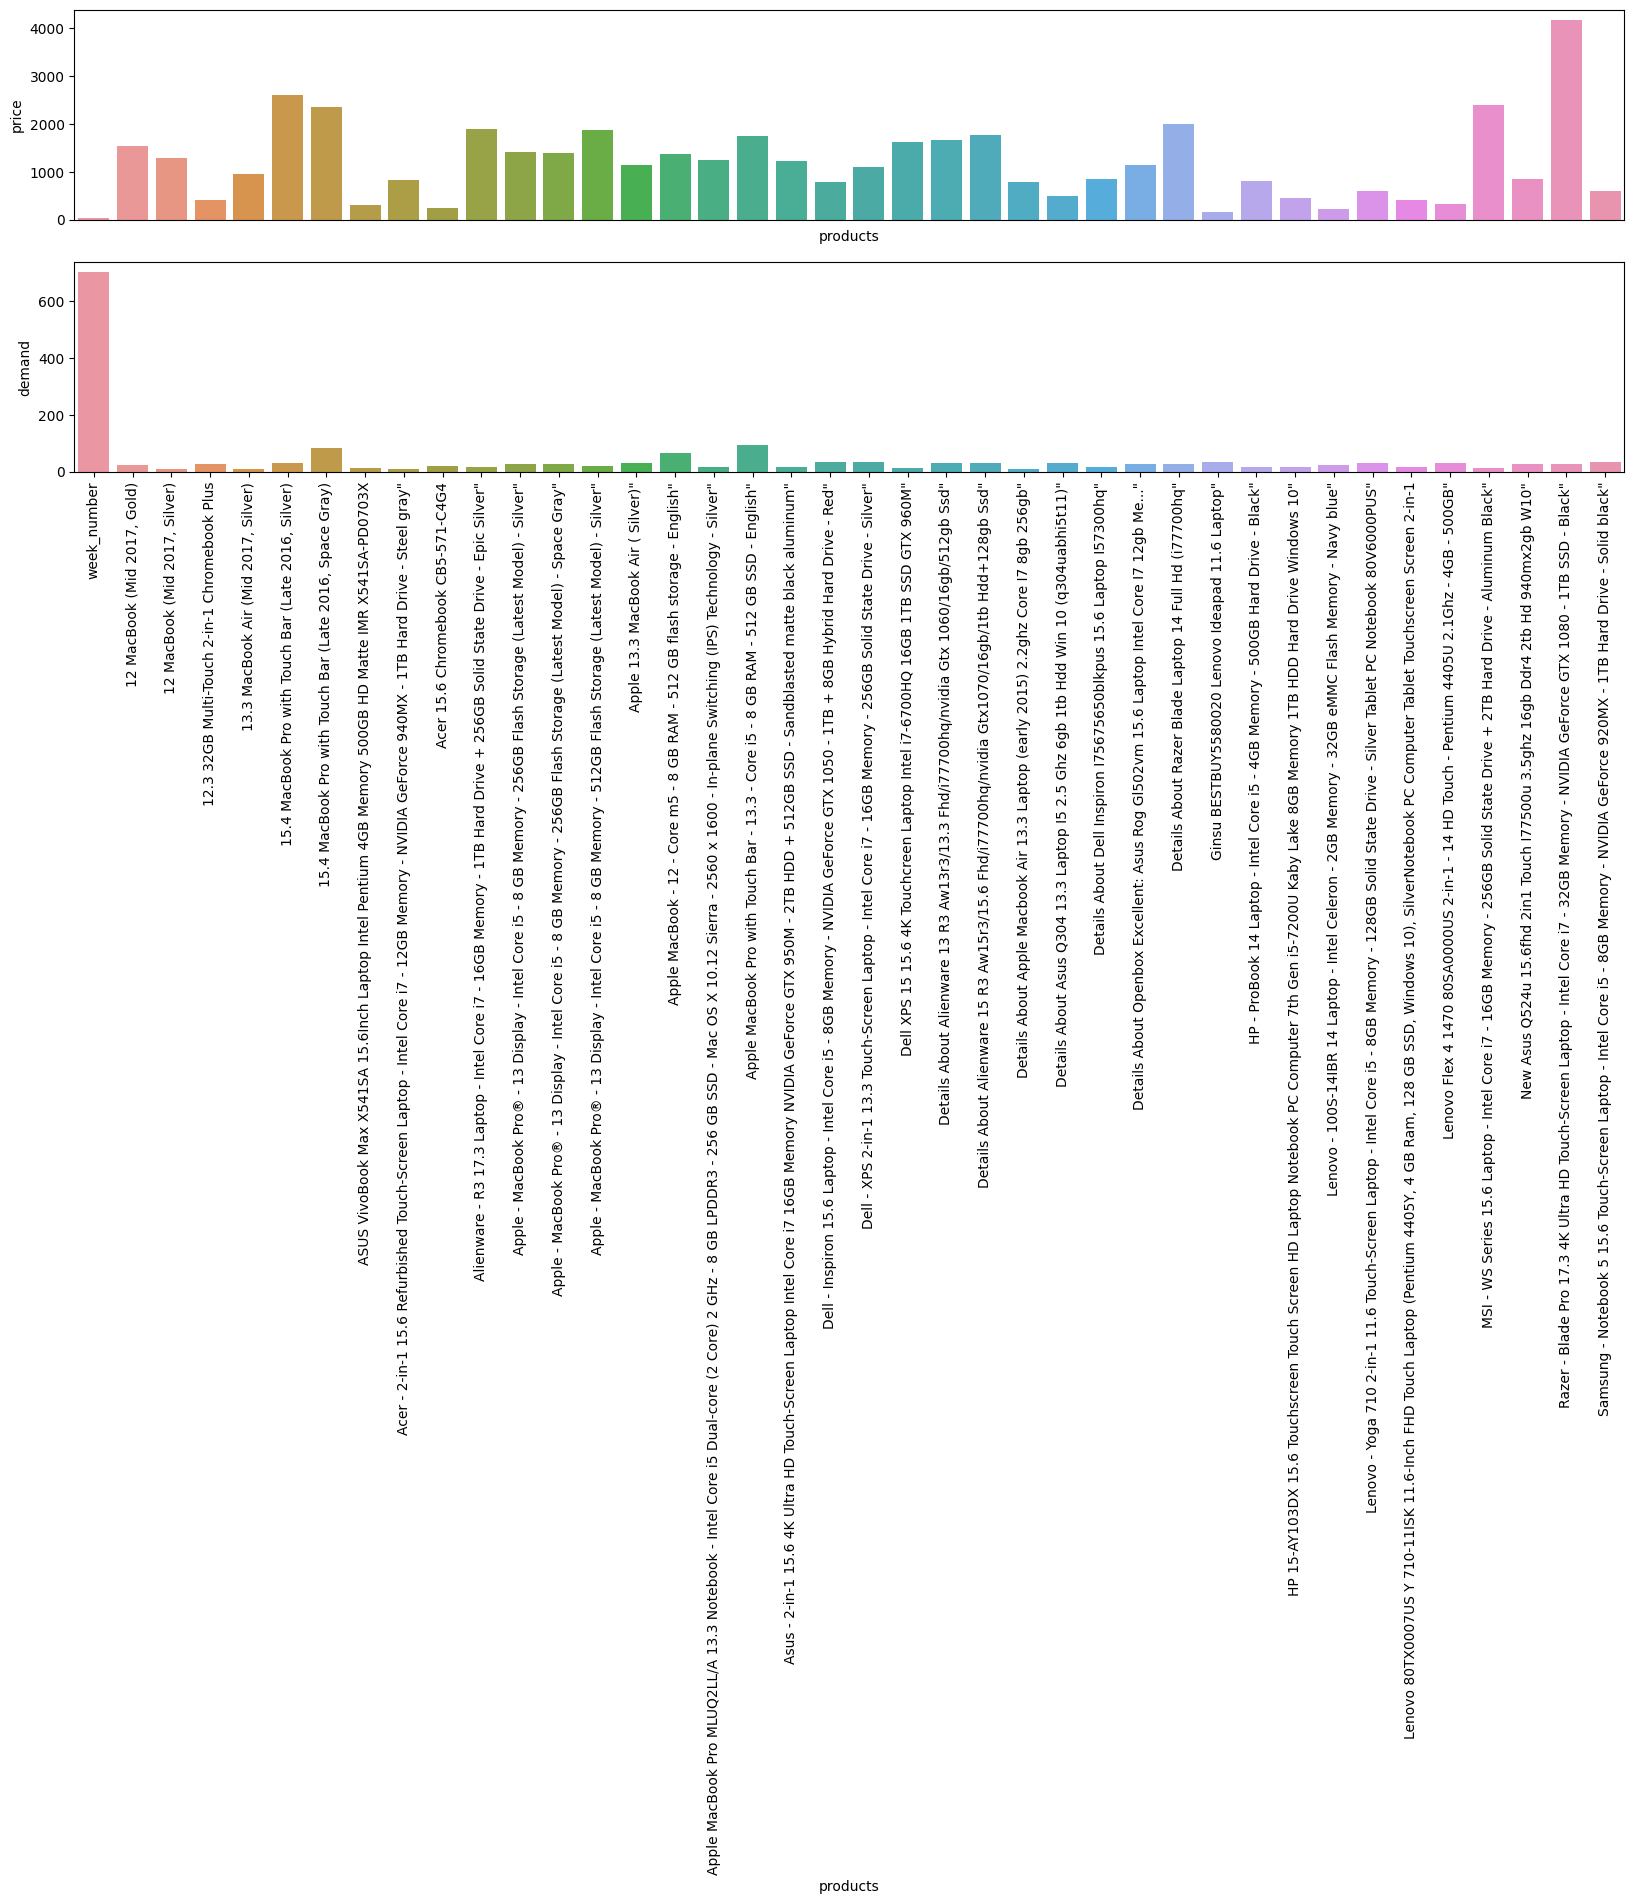

In [46]:
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1)
aux1 = pd.DataFrame(x_price.apply( lambda x: x.median())).reset_index()
aux1.columns = ['products', 'price']
sns.barplot(x='products', y='price', data=aux1)
plt.xticks([])

plt.subplot(2, 1, 2)
aux2 = pd.DataFrame(y_demand.apply( lambda x: x.sum())).reset_index()
aux2.columns = ['products', 'demand']
plt.xticks(rotation=90)
sns.barplot(x='products', y='demand', data=aux2)

In [47]:
a =   ['12 MacBook (Mid 2017, Gold)', '12 MacBook (Mid 2017, Silver)',
       '12.3 32GB Multi-Touch 2-in-1 Chromebook Plus',
       '13.3 MacBook Air (Mid 2017, Silver)',
       '15.4 MacBook Pro with Touch Bar (Late 2016, Silver)',
       '15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)',
       'ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X',
       'Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"',
       'Acer 15.6 Chromebook CB5-571-C4G4',
       'Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Silver"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Space Gray"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 512GB Flash Storage (Latest Model) - Silver"',
       'Apple 13.3 MacBook Air ( Silver)"',
       'Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 GB flash storage - English"',
       'Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - Intel Core i5 Dual-core (2 Core) 2 GHz - 8 GB LPDDR3 - 256 GB SSD - Mac OS X 10.12 Sierra - 2560 x 1600 - In-plane Switching (IPS) Technology - Silver"',
       'Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English"',
       'Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen Laptop Intel Core i7 16GB Memory NVIDIA GeForce GTX 950M - 2TB HDD + 512GB SSD - Sandblasted matte black aluminum"',
       'Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce GTX 1050 - 1TB + 8GB Hybrid Hard Drive - Red"',
       'Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive - Silver"',
       'Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7-6700HQ 16GB 1TB SSD GTX 960M"',
       'Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i77700hq/nvidia Gtx 1060/16gb/512gb Ssd"',
       'Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i77700hq/nvidia Gtx1070/16gb/1tb Hdd+128gb Ssd"',
       'Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"',
       'Details About Asus Q304 13.3 Laptop I5 2.5 Ghz 6gb 1tb Hdd Win 10 (q304uabhi5t11)"',
       'Details About Dell Inspiron I75675650blkpus 15.6 Laptop I57300hq"',
       'Details About Openbox Excellent: Asus Rog Gl502vm 15.6 Laptop Intel Core I7 12gb Me..."',
       'Details About Razer Blade Laptop 14 Full Hd (i77700hq"',
       'Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"',
       'HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"',
       'HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10"',
       'Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue"',
       'Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS"',
       'Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1',
       'Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB"',
       'MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black"',
       'New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10"',
       'Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black"',
       'Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"']

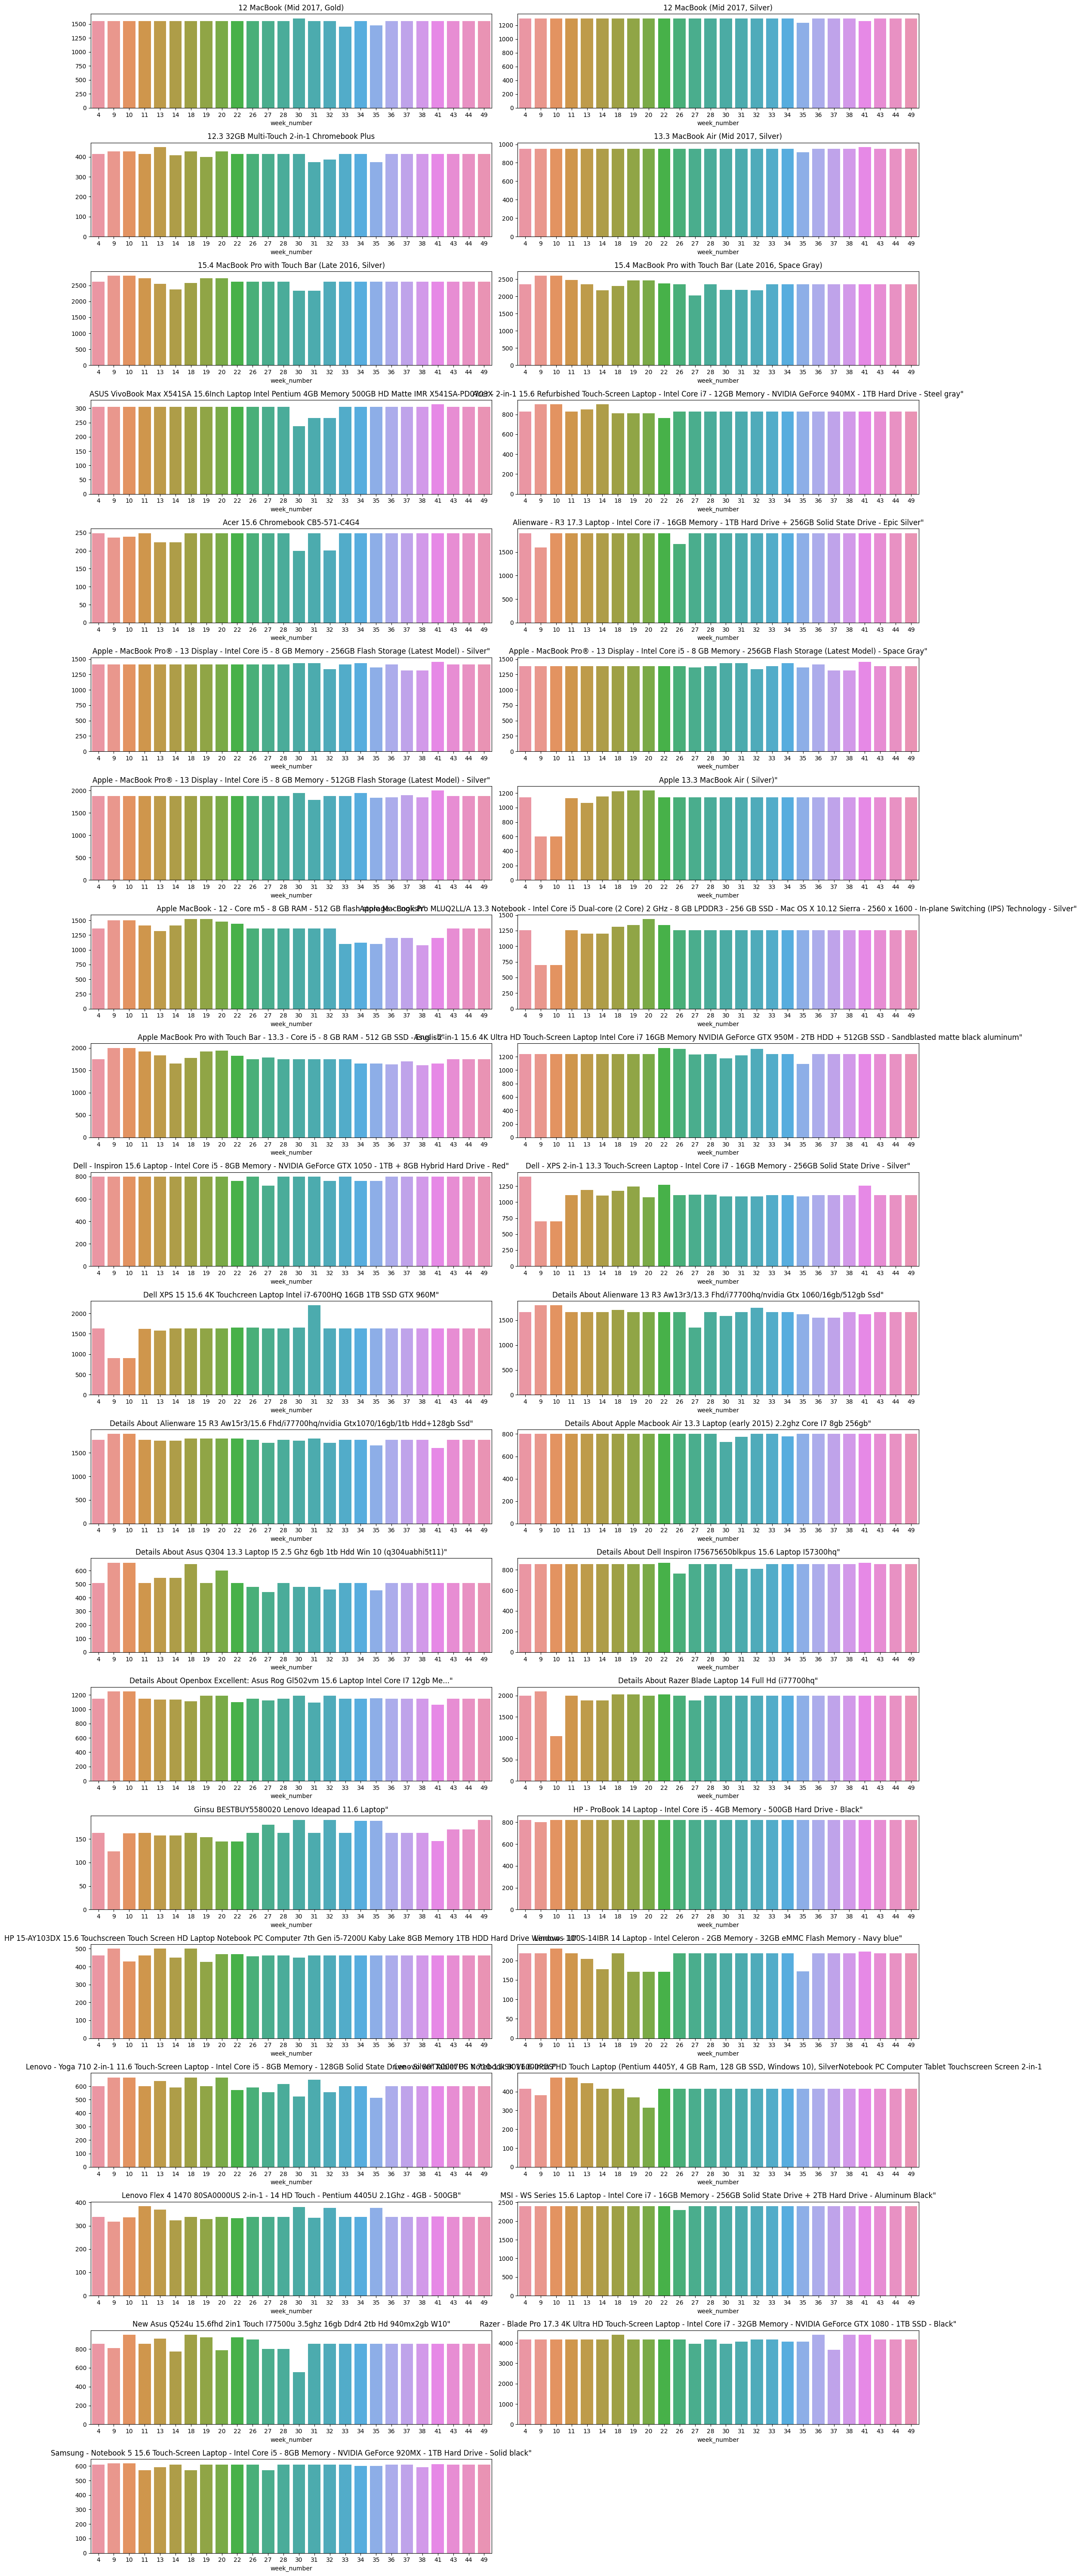

In [48]:
plt.figure(figsize=(20, 60))
for k in np.arange(1, len(x_price.columns), 1):
    plt.subplot(20,2,k)
    sns.barplot(data=x_price, x=x_price['week_number'], y=x_price[x_price.columns[k]]);
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()

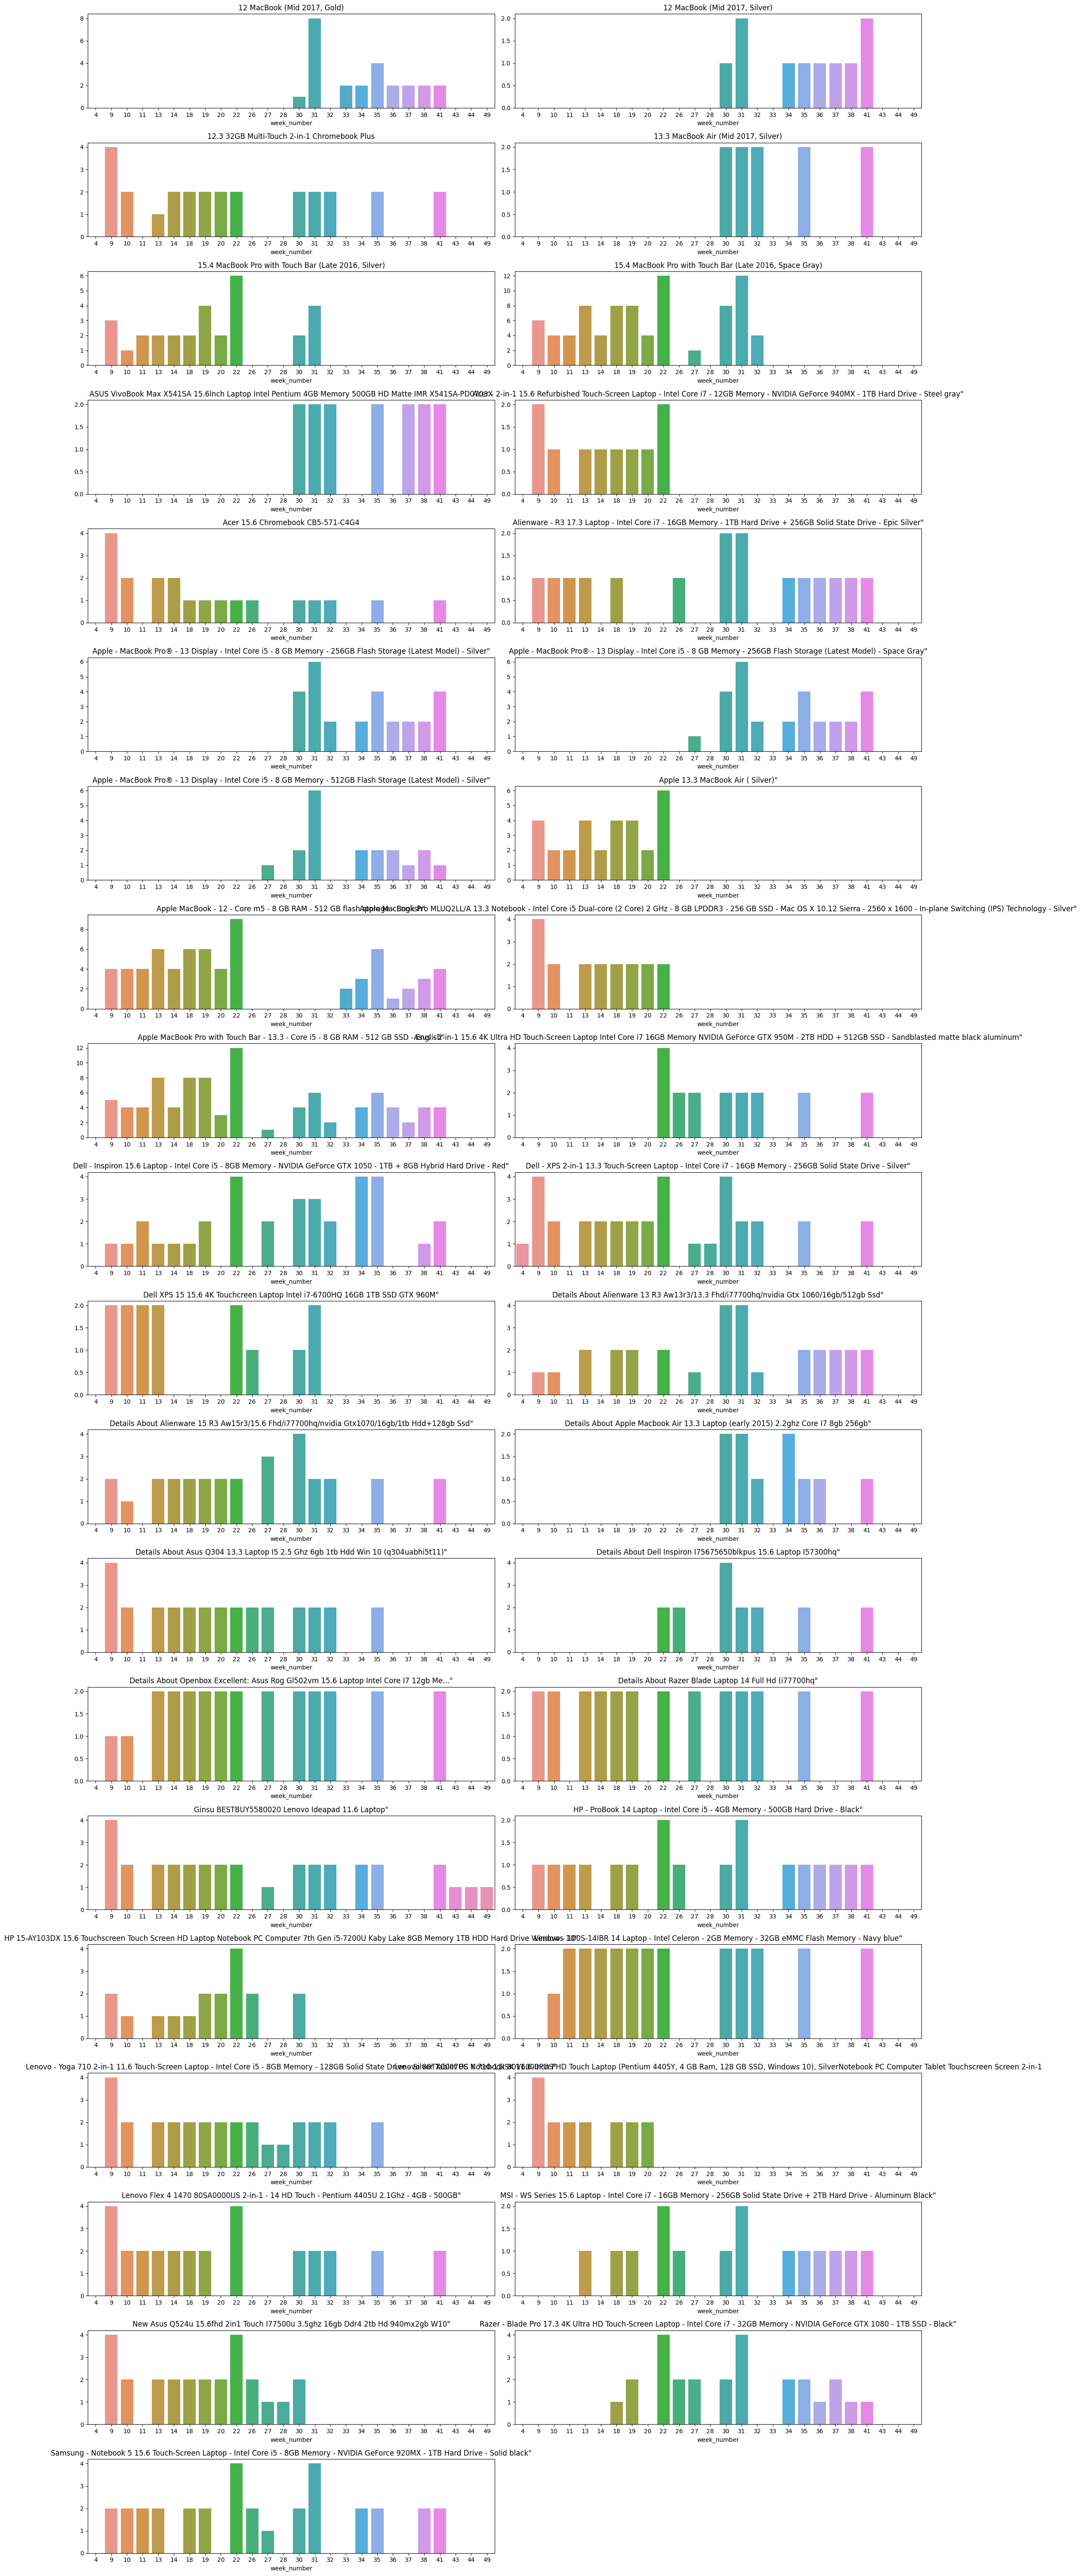

In [49]:
plt.figure(figsize=(20, 60))
for k in np.arange(1, len(y_demand.columns), 1):
    plt.subplot(20,2,k)
    sns.barplot(data=y_demand, x=y_demand['week_number'], y=y_demand[y_demand.columns[k]]);
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()

# 6.0 Machine Learning

In [50]:
#BestBuy.com -> categoria = laptop, computer

## 6.1 12 MacBook (Mid 2017, Gold)

In [51]:
import statsmodels.api as sm
x_laptop = x_price['12 MacBook (Mid 2017, Gold)']
y_laptop = y_demand['12 MacBook (Mid 2017, Gold)']
X_laptop = sm.add_constant(x_laptop)
model = sm.OLS(y_laptop, X_laptop)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     12 MacBook (Mid 2017, Gold)   R-squared:                       0.081
Model:                                     OLS   Adj. R-squared:                  0.042
Method:                          Least Squares   F-statistic:                     2.108
Date:                         Wed, 14 Jun 2023   Prob (F-statistic):              0.159
Time:                                 17:07:46   Log-Likelihood:                -50.564
No. Observations:                           26   AIC:                             105.1
Df Residuals:                               24   BIC:                             107.6
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

## 6.2 Todas as colunas

In [52]:
results_values_laptop = {
    "name": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "slope": [],
    "rsquared": [],
    "p_value": []
}


for column in x_price.columns[1:]:
    column_points = []
    for i in range(len(x_price[column])):
        column_points.append((x_price[column][i], y_demand[column][i]))
    df = pd.DataFrame(list(column_points), columns=['x_price', 'y_demand'])
    

    x_laptop = df['x_price']
    y_laptop = df['y_demand']
    X_laptop = sm.add_constant(x_laptop)
    #machine learning
    model = sm.OLS(y_laptop, X_laptop)
    results = model.fit()

    if results.f_pvalue < 0.05:
        
        rsquared = results.rsquared
        p_value = results.f_pvalue
        intercept, slope = results.params
        mean_price = np.mean(x_laptop)
        mean_quantity = np.mean(y_laptop)


        price_elasticity = slope*(mean_price/mean_quantity)

        results_values_laptop['name'].append(column)
        results_values_laptop['price_elasticity'].append(price_elasticity)
        results_values_laptop['price_mean'].append(mean_price)
        results_values_laptop['quantity_mean'].append(mean_quantity)
        results_values_laptop['intercept'].append(intercept)
        results_values_laptop['slope'].append(slope)
        results_values_laptop['rsquared'].append(rsquared)
        results_values_laptop['p_value'].append(p_value)

df_elasticity = pd.DataFrame.from_dict(results_values_laptop)

In [53]:
df_elasticity

name  price_elasticity  \
0                      12 MacBook (Mid 2017, Silver)        -65.115595   
1  ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...        -16.039643   
2                  Acer 15.6 Chromebook CB5-571-C4G4         -8.432545   
3  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...         -6.018642   
4  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...        -23.203537   
5  Details About Apple Macbook Air 13.3 Laptop (e...        -68.165723   
6  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...         -6.049399   

    price_mean  quantity_mean  intercept     slope  rsquared   p_value  
0  1295.990000       0.384615  25.429075 -0.019325  0.196027  0.023508  
1   299.720769       0.538462   9.175192 -0.028816  0.281984  0.005251  
2   242.479231       0.769231   7.255804 -0.026751  0.161645  0.041743  
3  1224.221154       0.692308   4.859060 -0.003404  0.236464  0.011774  
4   790.759231       1.307692  31.650779 -0.038372  0.327839  0.002237  
5   795.509231       0.384615  26.602201 -0.032957  0.510312  0.000041  
6   209.663077       0.961538   6.778268 -0.027743  0.277667  0.005677

# 7.0 Elasticidade

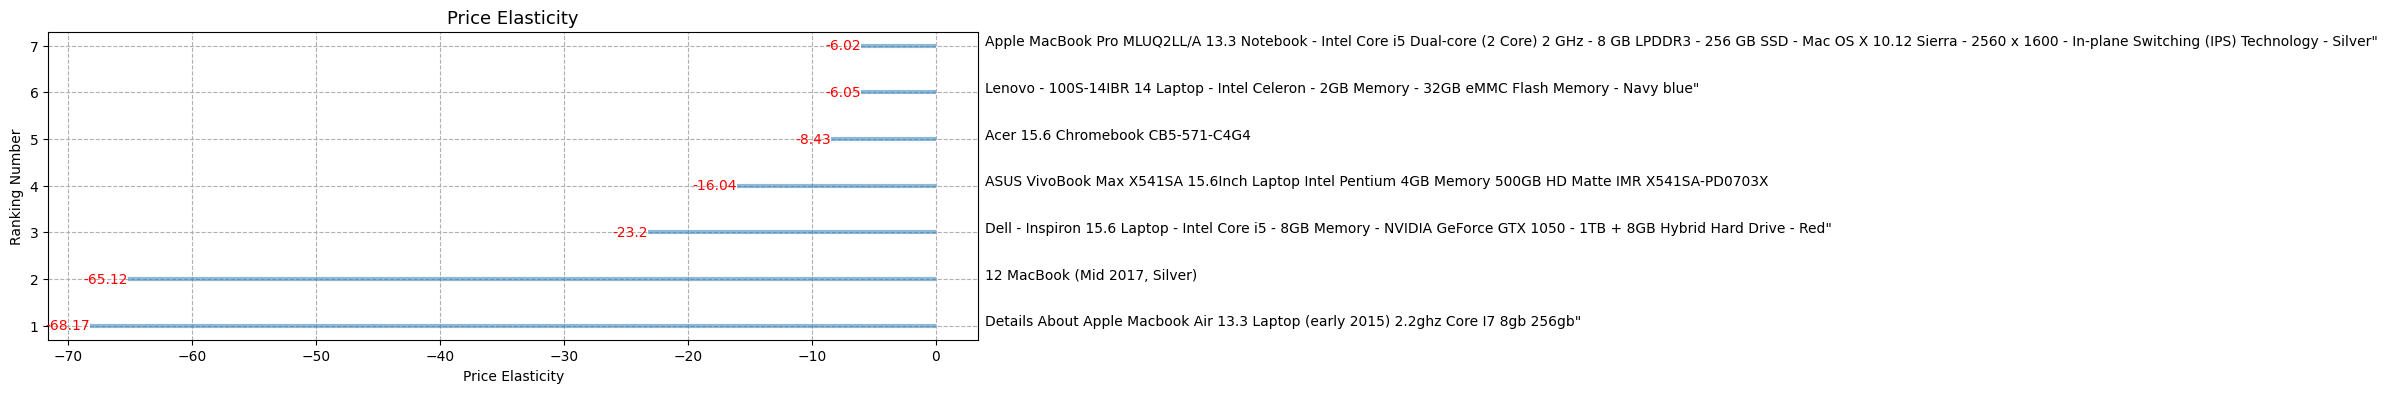

In [54]:
df_elasticity['ranking'] = df_elasticity.loc[ : ,'price_elasticity'].rank( ascending = True).astype(int)
df_elasticity = df_elasticity.reset_index(drop = True)
plt.figure(figsize = (12,4))
plt.hlines(y = df_elasticity['ranking'] , xmin = 0, xmax = df_elasticity['price_elasticity'], alpha = 0.5, linewidth = 3)

for name, p in zip(df_elasticity['name'], df_elasticity['ranking']):
    plt.text(4, p, name)

 #Add elasticity labels
for x, y, s in zip(df_elasticity['price_elasticity'], df_elasticity['ranking'], df_elasticity['price_elasticity']):
    plt.text(x, y, round(s, 2), horizontalalignment='right' if x < 0 else 'left', 
                                verticalalignment='center', 
                                fontdict={'color':'red' if x < 0 else 'green', 'size':10})
    
plt.gca().set(ylabel= 'Ranking Number', xlabel= 'Price Elasticity')
plt.title('Price Elasticity' , fontdict={'size':13})
plt.grid(linestyle='--')

In [55]:
df_order_elasticity = df_elasticity[['ranking', 'name', 'price_elasticity']].sort_values(by='price_elasticity', ascending=False)
df_order_elasticity

ranking                                               name  \
3        7  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...   
6        6  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...   
2        5                  Acer 15.6 Chromebook CB5-571-C4G4   
1        4  ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...   
4        3  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...   
0        2                      12 MacBook (Mid 2017, Silver)   
5        1  Details About Apple Macbook Air 13.3 Laptop (e...   

   price_elasticity  
3         -6.018642  
6         -6.049399  
2         -8.432545  
1        -16.039643  
4        -23.203537  
0        -65.115595  
5        -68.165723

# 8.0 Business Performance

In [56]:
resultado_faturamento = {
        'name': [],
        'faturamento_atual': [],
        'faturamento_reducao':[],
        'perda_faturamento':[],
        'faturamento_novo':[],
        'variacao_faturamento':[],
        'variacao_percentual':[]
}


for i in range(len(df_order_elasticity)):
    preco_atual_medio = x_price[df_order_elasticity['name'][i]].mean()
    demanda_atual = y_demand[df_order_elasticity['name'][i]].sum()

    reducao_preco = preco_atual_medio*0.9
    aumento_demanda = -0.1*df_order_elasticity['price_elasticity'][i]

    demanda_nova = aumento_demanda*demanda_atual

    faturamento_atual = round(preco_atual_medio*demanda_atual, 2)
    faturamento_novo = round(reducao_preco*demanda_nova, 2)

    variacao_faturamento = round(faturamento_novo-faturamento_atual ,2)

    variacao_percentual = round(((faturamento_novo-faturamento_atual)/faturamento_atual),2)




    faturamento_reducao = round(faturamento_atual*0.9, 2)

    perda_faturamento = round(faturamento_atual-faturamento_reducao, 2)

    


    resultado_faturamento['name'].append(df_order_elasticity['name'][i])
    resultado_faturamento['faturamento_atual'].append(faturamento_atual)
    resultado_faturamento['faturamento_redução'].append(faturamento_reducao)
    resultado_faturamento['perda_faturamento'].append(perda_faturamento)
    resultado_faturamento['faturamento_novo'].append(faturamento_novo)
    resultado_faturamento['variacao_faturamento'].append(variacao_faturamento)
    resultado_faturamento['variacao_percentual'].append(variacao_percentual)

resultado = pd.DataFrame(resultado_faturamento)
resultado

name  faturamento_atual  \
0                      12 MacBook (Mid 2017, Silver)           12959.90   
1  ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...            4196.09   
2                  Acer 15.6 Chromebook CB5-571-C4G4            4849.58   
3  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...           22035.98   
4  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...           26885.81   
5  Details About Apple Macbook Air 13.3 Laptop (e...            7955.09   
6  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...            5241.58   

   faturamento_redução  perda_faturamento  faturamento_novo  \
0             11663.91            1295.99          75950.24   
1              3776.48             419.61           6057.34   
2              4364.62             484.96           3680.49   
3             19832.38            2203.60          11936.40   
4             24197.23            2688.58          56146.14   
5              7159.58             795.51          48803.82   
6              4717.42             524.16           2853.75   

   variacao_faturamento  variacao_percentual  
0              62990.34                 4.86  
1               1861.25                 0.44  
2              -1169.09                -0.24  
3             -10099.58                -0.46  
4              29260.33                 1.09  
5              40848.73                 5.13  
6              -2387.83                -0.46

In [57]:
preco_atual_medio = x_price['Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"'].mean()
demanda_atual = y_demand['Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"'].sum()

reducao_preco = preco_atual_medio*0.9
aumento_demanda = -0.1*df_order_elasticity['price_elasticity'][5]

demanda_nova = aumento_demanda*demanda_atual

faturamento_atual = preco_atual_medio*demanda_atual
faturamento_novo = reducao_preco*demanda_nova

faturamento_reducao = faturamento_atual*0.9

print(f'O faturamento atual é R$ {round(faturamento_atual, 2)}, com a redução de 10% sugerida seria R$ {round(faturamento_reducao, 2)}, portanto diminuíria R${round(faturamento_atual-faturamento_reducao, 2) }.')
print(f'Mas com o aumento da demanda devido a redução, o faturamento seria R$ {round(faturamento_novo, 2)}, gerando um um incremento de R${round(faturamento_novo-faturamento_atual, 2)} ou {round(((faturamento_novo-faturamento_atual)/faturamento_atual)*100, 2)} % no faturamento')

O faturamento atual é R$ 7955.09, com a redução de 10% sugerida seria R$ 7159.58, portanto diminuíria R$795.51.
Mas com o aumento da demanda devido a redução, o faturamento seria R$ 48803.82, gerando um um incremento de R$40848.72 ou 513.49 % no faturamento


# 9.0 Cross Price Elasticity

In [58]:
def crossprice ( df_x, df_y, column_name):
    import statsmodels.api as sm
    # pegando todos os valores de x_price
    new_df = x_price.copy()
    # peganado os valores y_demand com o mesmo nome da coluna
    new_df['y_value-' + column_name] = y_demand[column_name]

    multi_xvalues =new_df.loc[:, new_df.columns[1:-1]]
    multi_yvalues = new_df.loc[:, new_df.columns[-1]]

    # obter o valor médio do preço do produto
    mean_xvalues = np.mean(multi_xvalues)
    # obter o valor médio da demanda do produto
    mean_yvalues = np.mean(multi_yvalues)


    # regressão linear
    X = sm.add_constant(multi_xvalues)
    model = sm.OLS(multi_yvalues, X, missing='drop')
    result = model.fit()

    #obtendo os resultados
    results_summary = result.summary()
    # p-valores para cada coeficiente
    pvalue = result.pvalues

    # transformando o resultado em uma dataframe
    results_as_html = results_summary.tables[1].as_html()
    new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]

    #adicionando o p-valor ao dataframe
    new_dataframe['p_value'] = pvalue

    #definindo o nome do produto como indice
    new_dataframe.index.name= 'name'
    new_dataframe.reset_index()

    #calculando a elasticidade cruzada
    new_dataframe['mean'] = mean_xvalues
    new_dataframe['price_elasticity'] = round((new_dataframe.coef)*(new_dataframe['mean']/mean_yvalues), 2)

    new_dataframe = new_dataframe.reset_index()
    pvalue_siginicant = new_dataframe['p_value']

    #verificando a hipótese nula(inclinação por produto)
    new_dataframe[column_name + 'CPE'] = np.where((pvalue_siginicant > 0.05), 'No Effect', new_dataframe['price_elasticity'])
    new_dataframe = new_dataframe.dropna()
    return new_dataframe[['name', column_name + 'CPE']]

In [59]:
result_df = pd.DataFrame()
for column in x_price.columns[1:]:
    result_df[['name', column +'CPE']] = crossprice(x_price, y_demand, column)

result_df = result_df.set_index('name')

/home/alexsandro/.pyenv/versions/3.10-dev/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/alexsandro/.pyenv/versions/3.10-dev/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/alexsandro/.pyenv/versions/3.10-dev/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  re

In [60]:
result_df

12 MacBook (Mid 2017, Gold)CPE  \
name                                                                                
12 MacBook (Mid 2017, Gold)                                                 -9.33   
12 MacBook (Mid 2017, Silver)                                              -10.51   
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                 -9.5   
13.3 MacBook Air (Mid 2017, Silver)                                          0.89   
15.4 MacBook Pro with Touch Bar (Late 2016, Sil...                            1.9   
15.4 MacBook Pro with Touch Bar (Late 2016, Spa...                           9.52   
ASUS VivoBook Max X541SA 15.6Inch Laptop Intel ...                          -3.55   
Acer - 2-in-1 15.6 Refurbished Touch-Screen Lap...                         -13.36   
Acer 15.6 Chromebook CB5-571-C4G4                                           -0.13   
Alienware - R3 17.3 Laptop - Intel Core i7 - 16...                         -13.68   
Apple - MacBook Pro® - 13 Display - Intel Core ...                         -18.09   
Apple - MacBook Pro® - 13 Display - Intel Core ...                          11.83   
Apple - MacBook Pro® - 13 Display - Intel Core ...                          16.84   
Apple 13.3 MacBook Air ( Silver)"                                           -0.92   
Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 G...                          -7.51   
Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - Int...                         -18.21   
Apple MacBook Pro with Touch Bar - 13.3 - Core ...                           0.14   
Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen Lap...                          -3.73   
Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8...                          -5.43   
Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - In...                      No Effect   
Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7-...                          25.61   
Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i...                         -13.92   
Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i...                           2.03   
Details About Apple Macbook Air 13.3 Laptop (ea...                           0.25   
Details About Asus Q304 13.3 Laptop I5 2.5 Ghz ...                           9.67   
Details About Dell Inspiron I75675650blkpus 15....                          -4.59   
Details About Openbox Excellent: Asus Rog Gl502...                           6.58   
Details About Razer Blade Laptop 14 Full Hd (i7...                          -3.86   
Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"                        No Effect   
HP - ProBook 14 Laptop - Intel Core i5 - 4GB Me...                           6.39   
HP 15-AY103DX 15.6 Touchscreen Touch Screen HD ...                          -0.77   
Lenovo - 100S-14IBR 14 Laptop - Intel Celeron -...                          -2.83   
Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lapt...                          -0.04   
Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Tou...                          -0.47   
Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD To...                           1.68   
MSI - WS Series 15.6 Laptop - Intel Core i7 - 1...                          39.62   
New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5gh...                          -0.01   
Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen...                            5.2   
Samsung - Notebook 5 15.6 Touch-Screen Laptop -...                           3.58   

                                                   12 MacBook (Mid 2017, Silver)CPE  \
name                                                                                  
12 MacBook (Mid 2017, Gold)                                                    18.5   
12 MacBook (Mid 2017, Silver)                                                -10.45   
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                  -8.38   
13.3 MacBook Air (Mid 2017, Silver)                                            2.71   
15.4 MacBook Pro with Touch Bar (Late 2016,